In this assignment, we will be doing analysis and prediction with classification and clustering on the drug consumption dataset, this dataset contains various information about people that have been interviewed such as, psychological test scores, gender, age and more, along with their histpry wiht different types of drugs and other addictive substances, all of these being targets, and classified from CL0 which corresponds to "never used" to CL6 which corresponds to "used in the last day", with 5 other values inbetween. We will start by loading our libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

Now we can load our dataset into memory.

In [2]:
drugs = pd.read_csv('Drug_Consumption.csv', index_col=0)
drugs

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0


Next step, before separating our data into train and test values, is to check for any NaN values.

In [3]:
drugs.isna().sum()

Age 0
Gender 0
Education 0
Country 0
Ethnicity 0
Nscore 0
Escore 0
Oscore 0
AScore 0
Cscore 0
Impulsive 0
SS 0
Alcohol 0
Amphet 0
Amyl 0
Benzos 0
Caff 0
Cannabis 0
Choc 0
Coke 0
Crack 0
Ecstasy 0
Heroin 0
Ketamine 0
Legalh 0
LSD 0
Meth 0
Mushrooms 0
Nicotine 0
Semer 0
VSA 0
dtype: int64

Great, our data is clean of invalid values, so we can proceed to the EDA and train-test splitting.

# Train-test split

For our train-test split we will be using a ratio of 9/1, this split will leave us with more train data, which should hopefully aid us in getting better models, and still have more than enough test data to get relevant observations.

In [4]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(drugs, test_size=0.1)

Now that we have our data split into training and testing data, we can proceed to our E.D.A wich we will do using the train data.

# Exploratory data analysis

We will begin our E.D.A by taking a look at every feature, we will alter data types or encode them as we see necessary as we go trough them.

Before we proceed to the analysis, we will create some generic data visualization functions that will help us construct our data exploration.

In [5]:
def numVisualisation (feature : str):#Generic function to create basic visualisations for numerical features
    fig, axes = plt.subplots(1,2, figsize=(25, 10))
    sns.histplot(data=train_data,x=feature,ax=axes[0])
    sns.violinplot(data=train_data,x=feature,ax=axes[1])

def catVisualisation(feature : str):#Generic function to create basic visualisations for categorical targets
    sns.countplot(data=train_data,x=feature)

Now we can start our analysis with the feature Age.

# Age

Age is a categorical feature, with each category representing an age group.

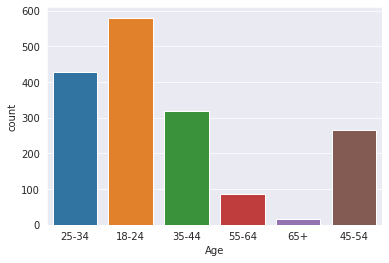

In [6]:
catVisualisation("Age")

The distribution is a little off, there are very few representatives of the 65+ category, so to make it more homogeneous, we will put the 55-64 and 65+ categories together into a new 55+ category that should keep most of the original information while making it more homogeneous and digestible.

In [7]:
ageTemp = train_data['Age']
ageTemp = ageTemp.replace('55-64','55+')
ageTemp = ageTemp.replace('65+','55+')
train_data['Age'] = ageTemp
ageTemp = test_data['Age']
ageTemp = ageTemp.replace('55-64','55+')
ageTemp = ageTemp.replace('65+','55+')
test_data['Age'] = ageTemp

Now we can plot the distribution for Age again, and hopefully it will be more even, without losing any information held in the original data.

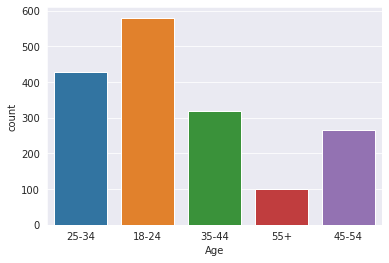

In [8]:
catVisualisation('Age')

Great, now that our data is more homogeneous, we can change it into an ordered categorical feature so it will perform better with our machine learning models.

In [9]:
train_data.Age = pd.Categorical(train_data.Age, categories=['18-24', '25-34', '35-44', '45-54', '55+'], ordered=True)

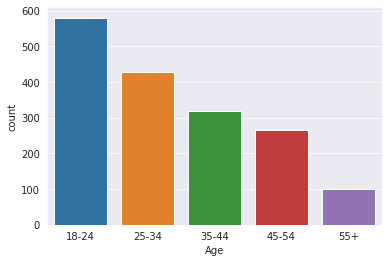

In [10]:
catVisualisation("Age")

Now we can proceed to our next feature, Gender.

# Gender

Gender is a categorical feature with only two categories M and F.

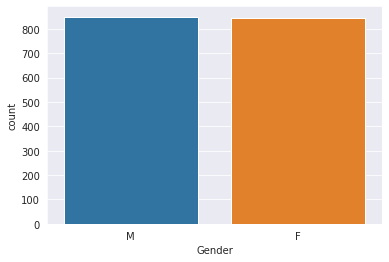

In [11]:
catVisualisation("Gender")

Both categories have basically equal representation. We will encode this feature as a simplified onde-hot-encoded feature, where instead of creating dummies for each and every category we will just change it into a new "IsMale" boolean feature, doing so will provide us with most of the benefits of one-hot encoding without the main disadvantage of having too many features.

In [12]:
Temp = train_data['Gender']
Temp = Temp.replace('M',True)
Temp = Temp.replace('F',False)
train_data['Gender'] = Temp
Temp = test_data['Gender']
Temp = Temp.replace('M',True)
Temp = Temp.replace('F',False)
test_data['Gender'] = Temp

train_data.rename(columns={'Gender': 'IsMale'}, inplace=True)
test_data.rename(columns={'Gender': 'IsMale'}, inplace=True)

train_data

,Age,IsMale,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1501,25-34,True,Doctorate degree,USA,Other,-0.34799,0.47617,-0.01928,-0.60633,-0.00665,...,CL3,CL3,CL3,CL3,CL3,CL3,CL3,CL6,CL0,CL0
974,18-24,True,"Some college or university, no certificate or ...",USA,White,1.49158,-1.23177,-1.11902,0.13136,-0.52745,...,CL4,CL0,CL3,CL0,CL3,CL3,CL3,CL6,CL0,CL0
1076,35-44,True,Left school at 18 years,UK,White,0.31287,-0.69509,-0.45174,-0.45321,-0.14277,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL3,CL0,CL0
1408,25-34,False,Masters degree,UK,White,-0.79151,0.80523,1.24033,1.28610,0.41594,...,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL5,CL0,CL0
1097,35-44,True,Masters degree,UK,Asian,-0.46725,0.96248,0.14143,-0.01729,0.93949,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,18-24,True,"Some college or university, no certificate or ...",Other,White,-1.55078,-1.23177,0.88309,1.61108,-1.78169,...,CL0,CL0,CL3,CL3,CL3,CL3,CL4,CL5,CL0,CL0
1095,18-24,True,University degree,Australia,White,-1.69163,-0.80615,-0.58331,-1.21213,-1.25773,...,CL4,CL0,CL0,CL4,CL4,CL0,CL3,CL0,CL0,CL4
1666,25-34,False,University degree,UK,White,-0.58016,0.47617,-0.71727,2.03972,0.93949,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0


We can do a quick visualisation again, jsut to check that the data wasn't actually altered.

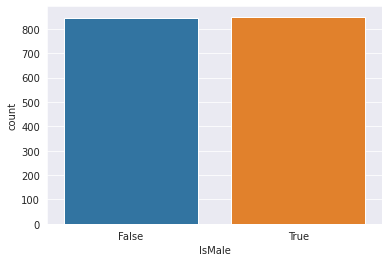

In [13]:
catVisualisation("IsMale")

The new feature looks ok, so we can go the next feature of Education

# Education

Education is a categorical feature that indicates up to what level of education the person being interviewed is certified at.

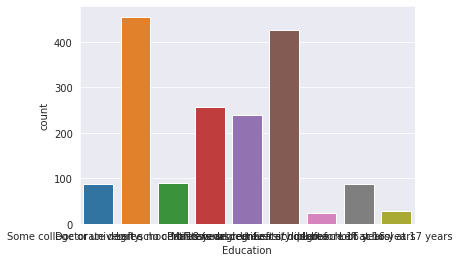

In [14]:
catVisualisation('Education')

Unfortunately, due to long category names, it is a bit hard to properly visualize Education, so we will use a simpler approach of just counting the total for each category.

In [15]:
train_data.Education.value_counts()

Some college or university, no certificate or degree 455
University degree 426
Masters degree 256
Professional certificate/ diploma 240
Left school at 18 years 90
Left school at 16 years 88
Doctorate degree 87
Left school at 17 years 29
Left school before 16 years 24
Name: Education, dtype: int64

As we can see, there are many categories relating to people that left school, all of them having relatively low counts, so we can just replace them with a single "left school" category, which should keep most the information while simplifying the data overall.

In [16]:
Temp = train_data['Education']
Temp = Temp.replace('Left school at 18 years','Left school')
Temp = Temp.replace('Left school at 16 years','Left school')
Temp = Temp.replace('Left school before 16 years','Left school')
Temp = Temp.replace('Left school at 17 years','Left school')
train_data['Education'] = Temp
Temp = test_data['Education']
Temp = Temp.replace('Left school at 18 years','Left school')
Temp = Temp.replace('Left school at 16 years','Left school')
Temp = Temp.replace('Left school before 16 years','Left school')
Temp = Temp.replace('Left school at 17 years','Left school')
test_data['Education'] = Temp

In [17]:
train_data.Education.value_counts()

Some college or university, no certificate or degree 455
University degree 426
Masters degree 256
Professional certificate/ diploma 240
Left school 231
Doctorate degree 87
Name: Education, dtype: int64

Now we can just make it a proper categorical feature, that we can even make ordered based on how far the participant made into formal education.

In [18]:
train_data.Education = pd.Categorical(train_data.Education, categories=['Left school', 'Some college or university, no certificate or degree', 'Professional certificate/ diploma', 'University degree', 'Masters degree', 'Doctorate degree'], ordered=True)

Now we can do a last quick check, just to make sure everything went well, and none of the data was corrupted or lost on accident.

In [19]:
train_data.Education.value_counts()

Some college or university, no certificate or degree 455
University degree 426
Masters degree 256
Professional certificate/ diploma 240
Left school 231
Doctorate degree 87
Name: Education, dtype: int64

Everything seems good, so we can just proceed to the next feature of Country.

# Country

The next feature we will analyse is the Country feature, it is a categorical feature that represents where the person who took part in the survey is from.

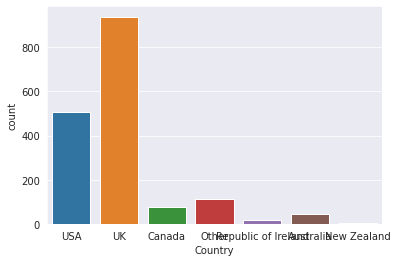

In [20]:
catVisualisation('Country')

As can be seen, the counts for the Republic of Ireland and New Zealand are very low, so we will put them together in the Other category, the same could be done with Canada and Australia, but that would loose too much information from the original survey.

In [21]:
Temp = train_data['Country']
Temp = Temp.replace('Republic of Ireland','Other')
Temp = Temp.replace('New Zealand','Other')
train_data['Country'] = Temp
Temp = test_data['Country']
Temp = Temp.replace('Republic of Ireland','Other')
Temp = Temp.replace('New Zealand','Other')
test_data['Country'] = Temp

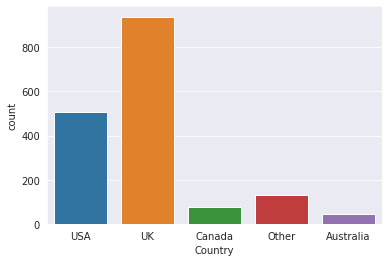

In [22]:
catVisualisation('Country')

Now our data is more organized and Readable, we can just make it into an unordered categorical feature.

In [23]:
train_data.Country = pd.Categorical(train_data.Country, categories=['UK', 'USA', 'Other', 'Canada', 'Australia'], ordered=False)

Now we can just do a quick last visualisation to verify that all went well

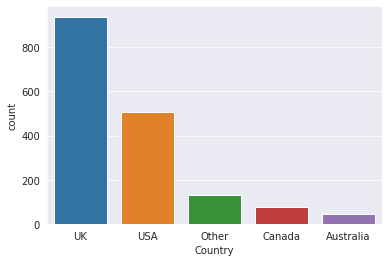

In [24]:
catVisualisation('Country')

Now that everything is good with our category, we can proceed to the next feature of Ethnicity

# Ethnicity

Ethnicity is a categorical feature that relates to the ethnicity of the participant in the survey.

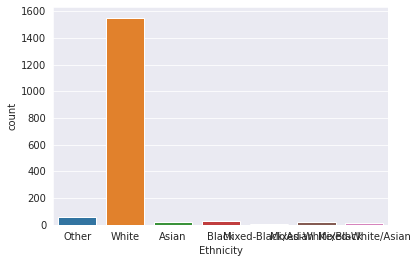

In [25]:
catVisualisation('Ethnicity')

This data is extremely skewed, with White having way more representation than other categories, unfortunately dropping so many entries would definitely distort our reading on the data, but we can group up some categories with fewer entries to hopefully make the representation more even, before so we should get a more detailed listing of the categories in this feature.

In [26]:
train_data.Ethnicity.value_counts()

White 1551
Other 57
Black 27
Asian 24
Mixed-White/Black 18
Mixed-White/Asian 15
Mixed-Black/Asian 3
Name: Ethnicity, dtype: int64

As we can see, most of the mixed categories have very few entries, so we will group them together with the part of their ethnicity that has less representation, so we will group Mixed-White/Black with Black, Mixed-White/Asian with Asian and Mixed-Black/Asian with Asian. 

In [27]:
Temp = train_data['Ethnicity']
Temp = Temp.replace('Mixed-White/Black','Black')
Temp = Temp.replace('Mixed-White/Asian','Asian')
Temp = Temp.replace('Mixed-Black/Asian','Asian')
train_data['Ethnicity'] = Temp
Temp = test_data['Ethnicity']
Temp = Temp.replace('Mixed-White/Black','Black')
Temp = Temp.replace('Mixed-White/Asian','Asian')
Temp = Temp.replace('Mixed-Black/Asian','Asian')
test_data['Ethnicity'] = Temp

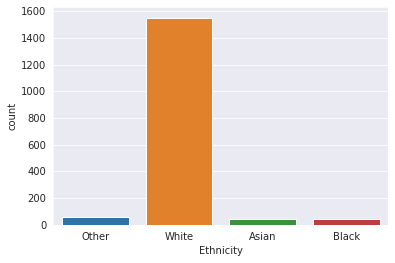

In [28]:
catVisualisation('Ethnicity')

Now our categories are mostly evened out, even if White still is massively overrepresented, there is no way of dealing with this besides improving surveying techniques, at least not without losing a ton of information.

Next we will convert it into an unordered categorical feature.

In [29]:
train_data.Ethnicity = pd.Categorical(train_data.Ethnicity, categories=['White', 'Other', 'Black', 'Asian'], ordered=False)

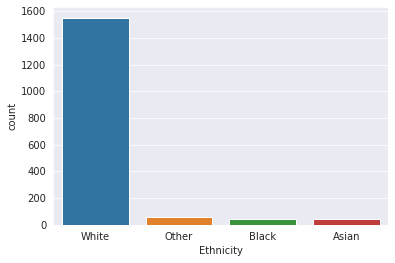

In [30]:
catVisualisation('Ethnicity')

Now that we have everything done for the Ethnicity feature, the next feature is Nscore

# Nscore

Nscore is a numerical feature that represents the score gotten on a psychological test to measure their neuroticism, we can start with some simple visualizations.

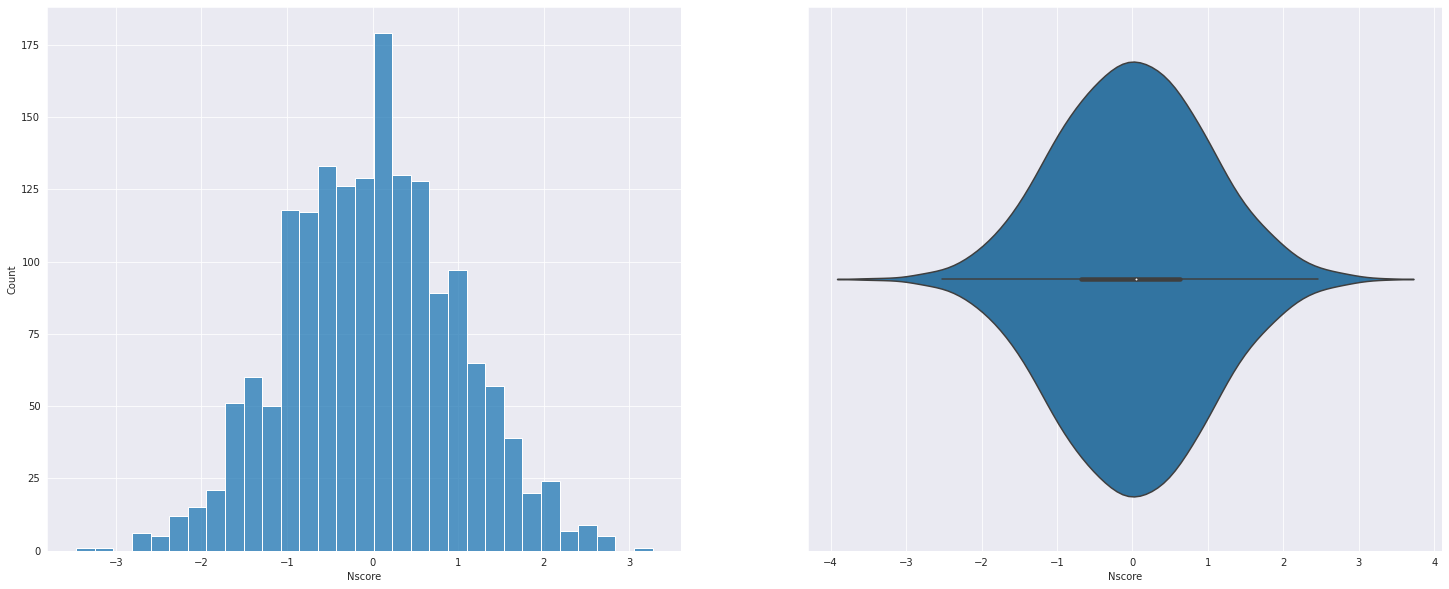

In [31]:
numVisualisation('Nscore')

As can be seen, the maximum score is just over 3, and the minimum score is just under 3; with a very close to normal distribution, there is no feature engineering to be done here, as there are no outliers and the distribution is good, so we can just go to the next feature of Escore.

# Escore

Escore, just like Nscore, represents the score the participant got in a psychological test, this time to access the of the participant

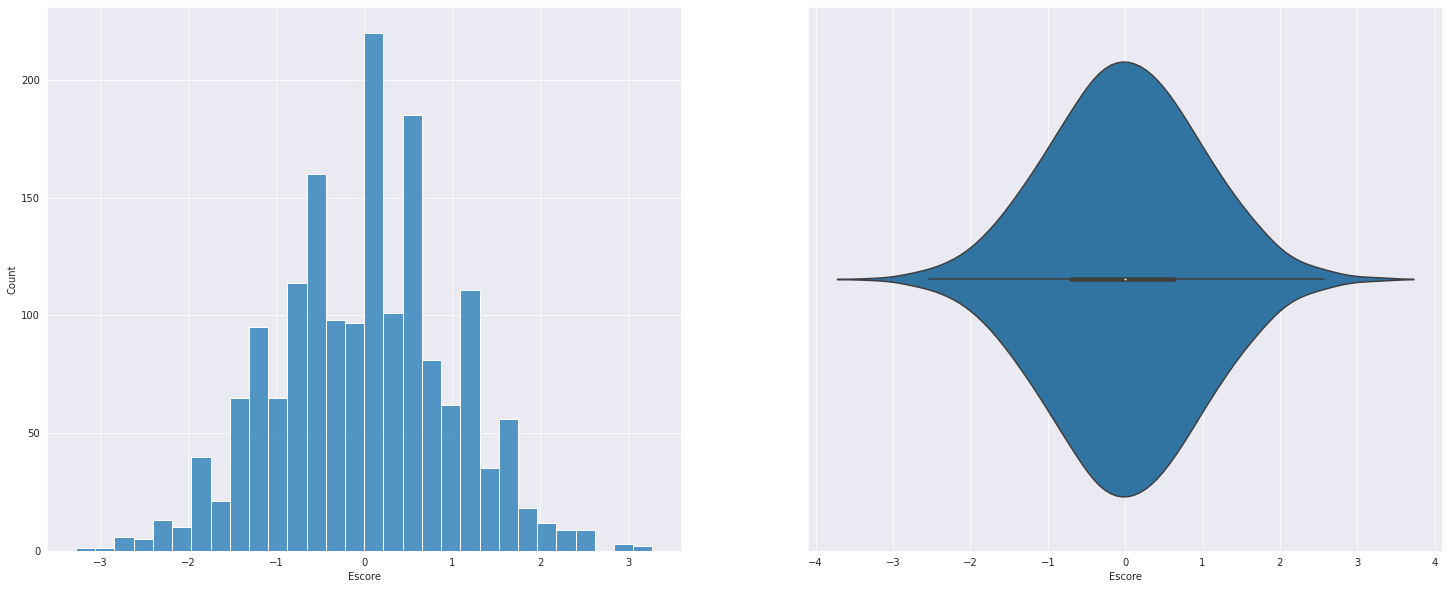

In [32]:
numVisualisation('Escore')

This feature also has a good distribution, being close to normal, and max values at around 3, and minimum at around -3, so we can proceed to the next feature of Oscore.

# Oscore

Oscore is a numerical feature representing the score acheived by participant in a psychological test relating to their openess to experience, to start we will do our standard visualizations.

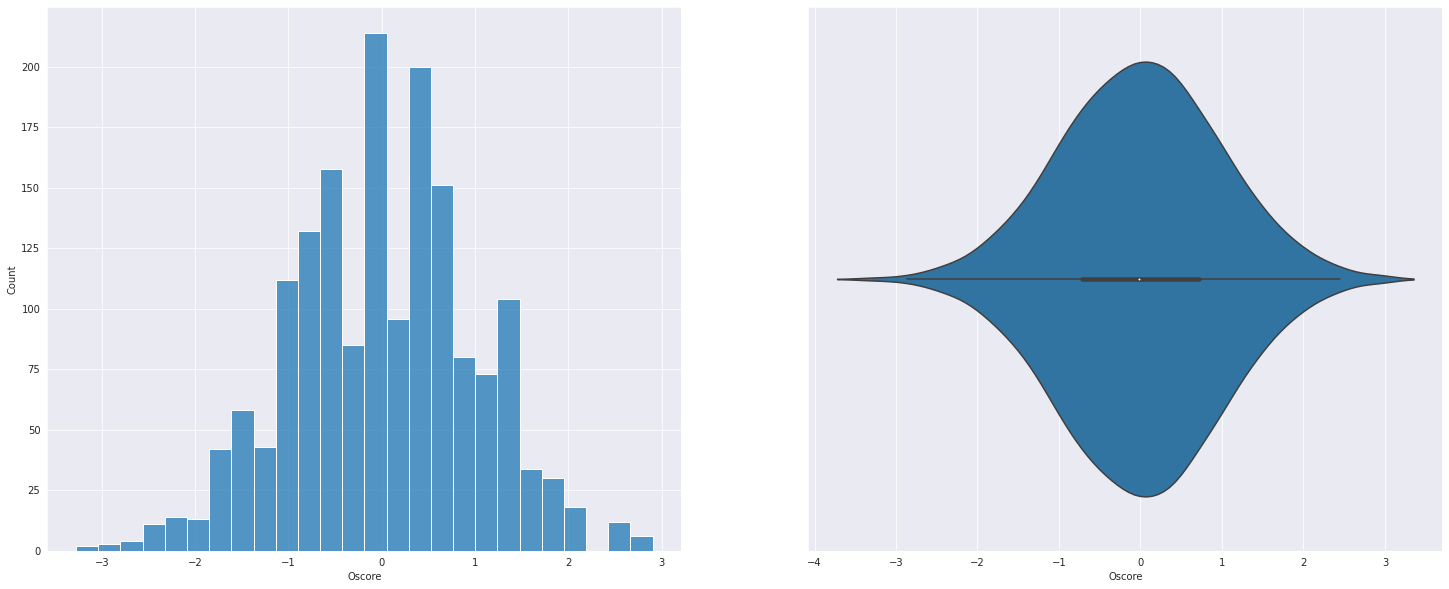

In [33]:
numVisualisation('Oscore')

This feature, like the other numerical features so far has a maximum value of around 3 as well as a minimum of around -3, as well as having a distribution very close to normal, so there isnt much to be done, we can proceed to the next feature of Ascore.

# AScore

Ascore, just like the other nuemrical features so far, represents the score acheived by the participant on a psychological test, this time to evaluate their agreableness, we will begin by doing our standard visualisations.

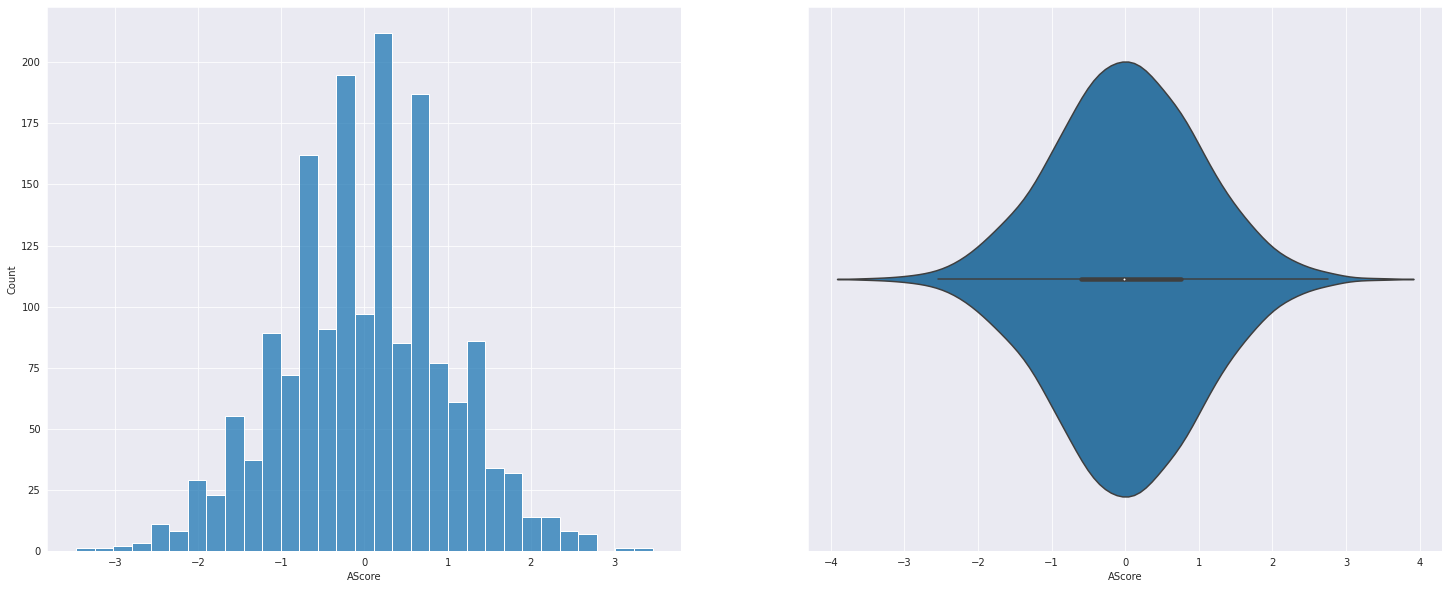

In [34]:
numVisualisation('AScore')

Just as all previous numerical features, AScore has a very close to normal distribution, and a minimum of aorund -3 as well as a maximum of around 3, there isn't any feature engineering to be done here, we can proceed to the next feature, Cscore.

# Cscore

Cscore is also refering to the score obtained by the participant on a psychological test, this time to measure their conscientiousness, we can start by doing our standard visualisations.

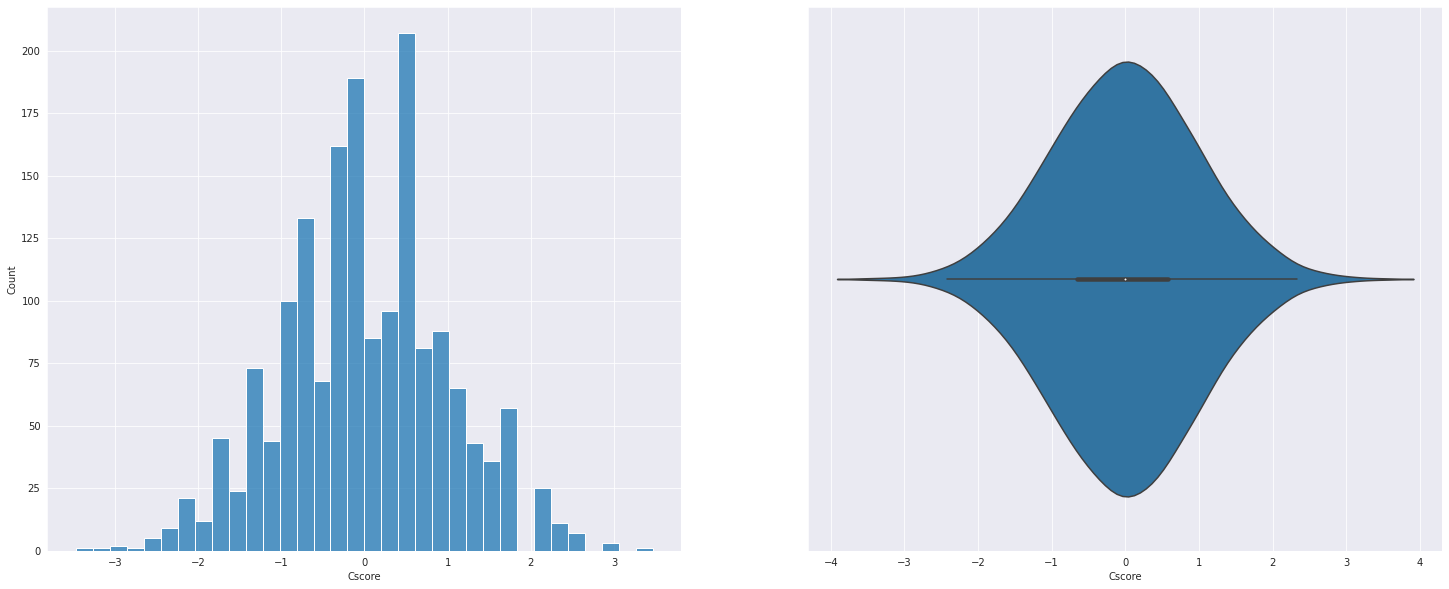

In [35]:
numVisualisation('Cscore')

Just as the rest of the numerical score features, Cscore has a minimum of around -3 and a maximum of around 3, with a very close to normal distribution, as always, there is nothing to be done here and we can proceed to the next feature of Impulsive

# Impulsive

Impulsive is also a numerical feature representing the score obtained by the participant on the BIS-11 test, to measure their impulsiveness, we can start our analysis with the standard visualisations.

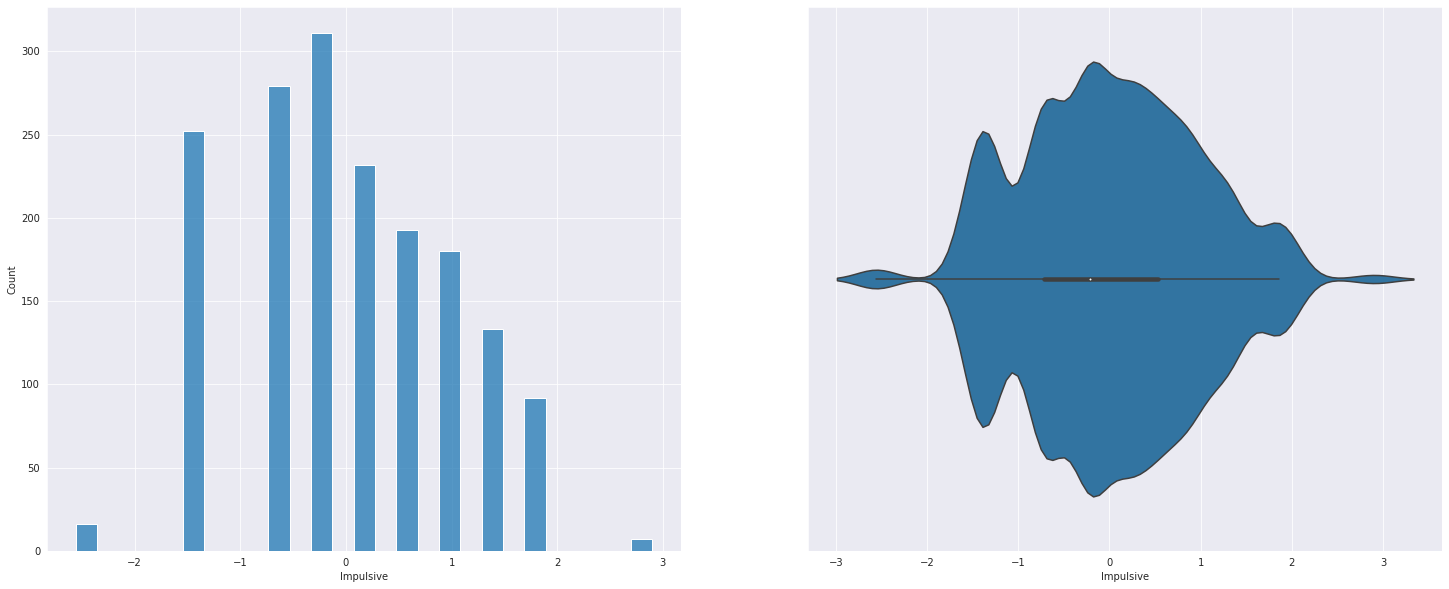

In [36]:
numVisualisation('Impulsive')

The data isn't as great as the other features, but the maximum still is around 3 and the minimum is close enough to -3, and the distribution is also close enough to a normal one, although not as great as the previous numerical features were, it should still be more than good enough and we can proceed to our last feature of SS.

# SS

SS is a numerical feature representing the score obtained by the participant in the impSS psychological testing, to evaluate their tendency to go sensation , we can start with the standard visualisations.

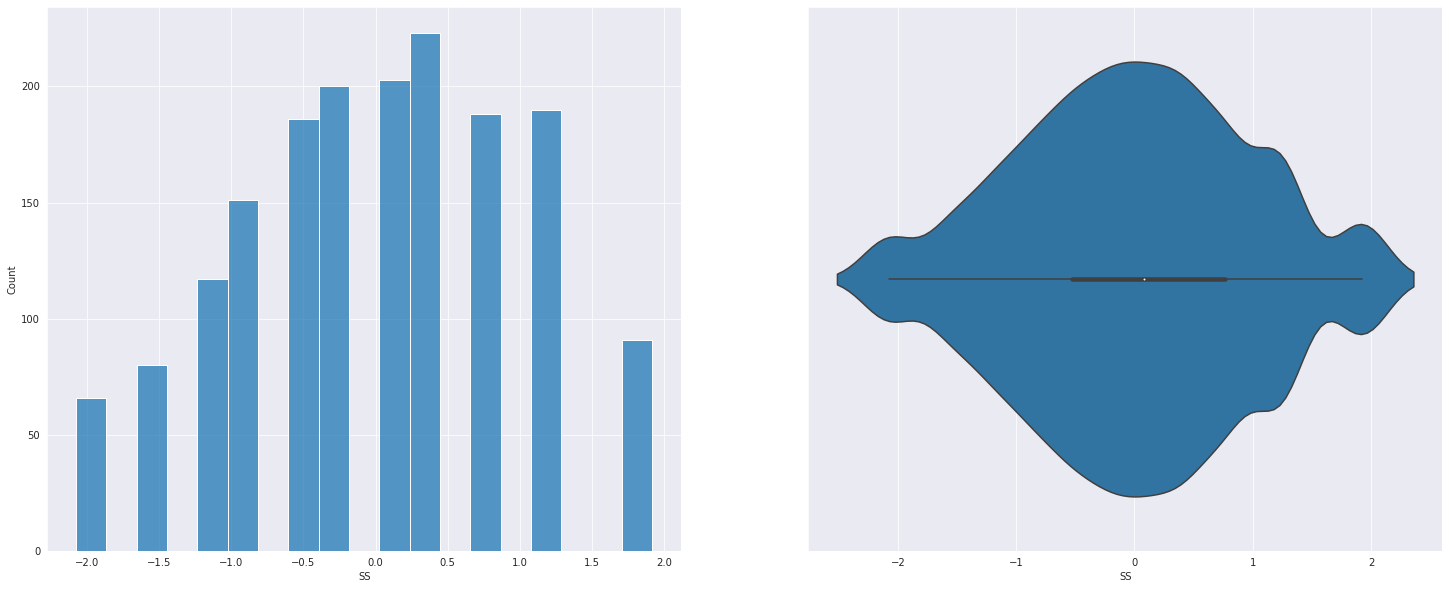

In [37]:
numVisualisation('SS')

The minimum and maximum aren't as close as ideal to the values of the other numerical features, but they are close enough to where it shouldnt be a problem, the distribution also looks good, if not a bit right-skewed, but again, it should not be a problem, this was our last feature, next we will do some target analysis.

# Target analysis

The targets that we will be analising in our study are alcohol, caffeine, cocaine and heroin, so these are all the features we will be doing an analysis on, before proceeding to the analysis its is worth remembereing the classification system used in the study, each category, ranging from A0 to A6 represents, respectively the answers: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

To start we will create a generic vizualisation function to aid us in visualizing the relationship between our fetures and targets, to visualize the targets, since they are all categorical we can jsut use the catVisiualisation function we have created and used before.

In [38]:
def VisualisationTgt(target : str):#generic function to create visualisations of the relationship between the target and the features
    fig, axes = plt.subplots(4,3, figsize=(40, 23))
    sns.histplot(data=train_data,hue=target,x='Age',ax=axes[0,0],multiple='stack')
    sns.histplot(data=train_data,hue=target,x='IsMale',ax=axes[0,1],multiple='stack')
    sns.histplot(data=train_data,hue=target,x='Education',ax=axes[0,2],multiple='stack')
    sns.histplot(data=train_data,hue=target,x='Country',ax=axes[1,0],multiple='stack')
    sns.histplot(data=train_data,hue=target,x='Ethnicity',ax=axes[1,1],multiple='stack')
    sns.histplot(data=train_data,hue=target,x='Nscore',ax=axes[1,2],multiple='stack')
    sns.histplot(data=train_data,hue=target,x='Escore',ax=axes[2,0],multiple='stack')
    sns.histplot(data=train_data,hue=target,x='Oscore',ax=axes[2,1],multiple='stack')
    sns.histplot(data=train_data,hue=target,x='AScore',ax=axes[2,2],multiple='stack')
    sns.histplot(data=train_data,hue=target,x='Cscore',ax=axes[3,0],multiple='stack')
    sns.histplot(data=train_data,hue=target,x='Impulsive',ax=axes[3,1],multiple='stack')
    sns.histplot(data=train_data,hue=target,x='SS',ax=axes[3,2],multiple='stack')

Now we can generate a quick visualisation for Alcohol just to check that our code worked fine.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


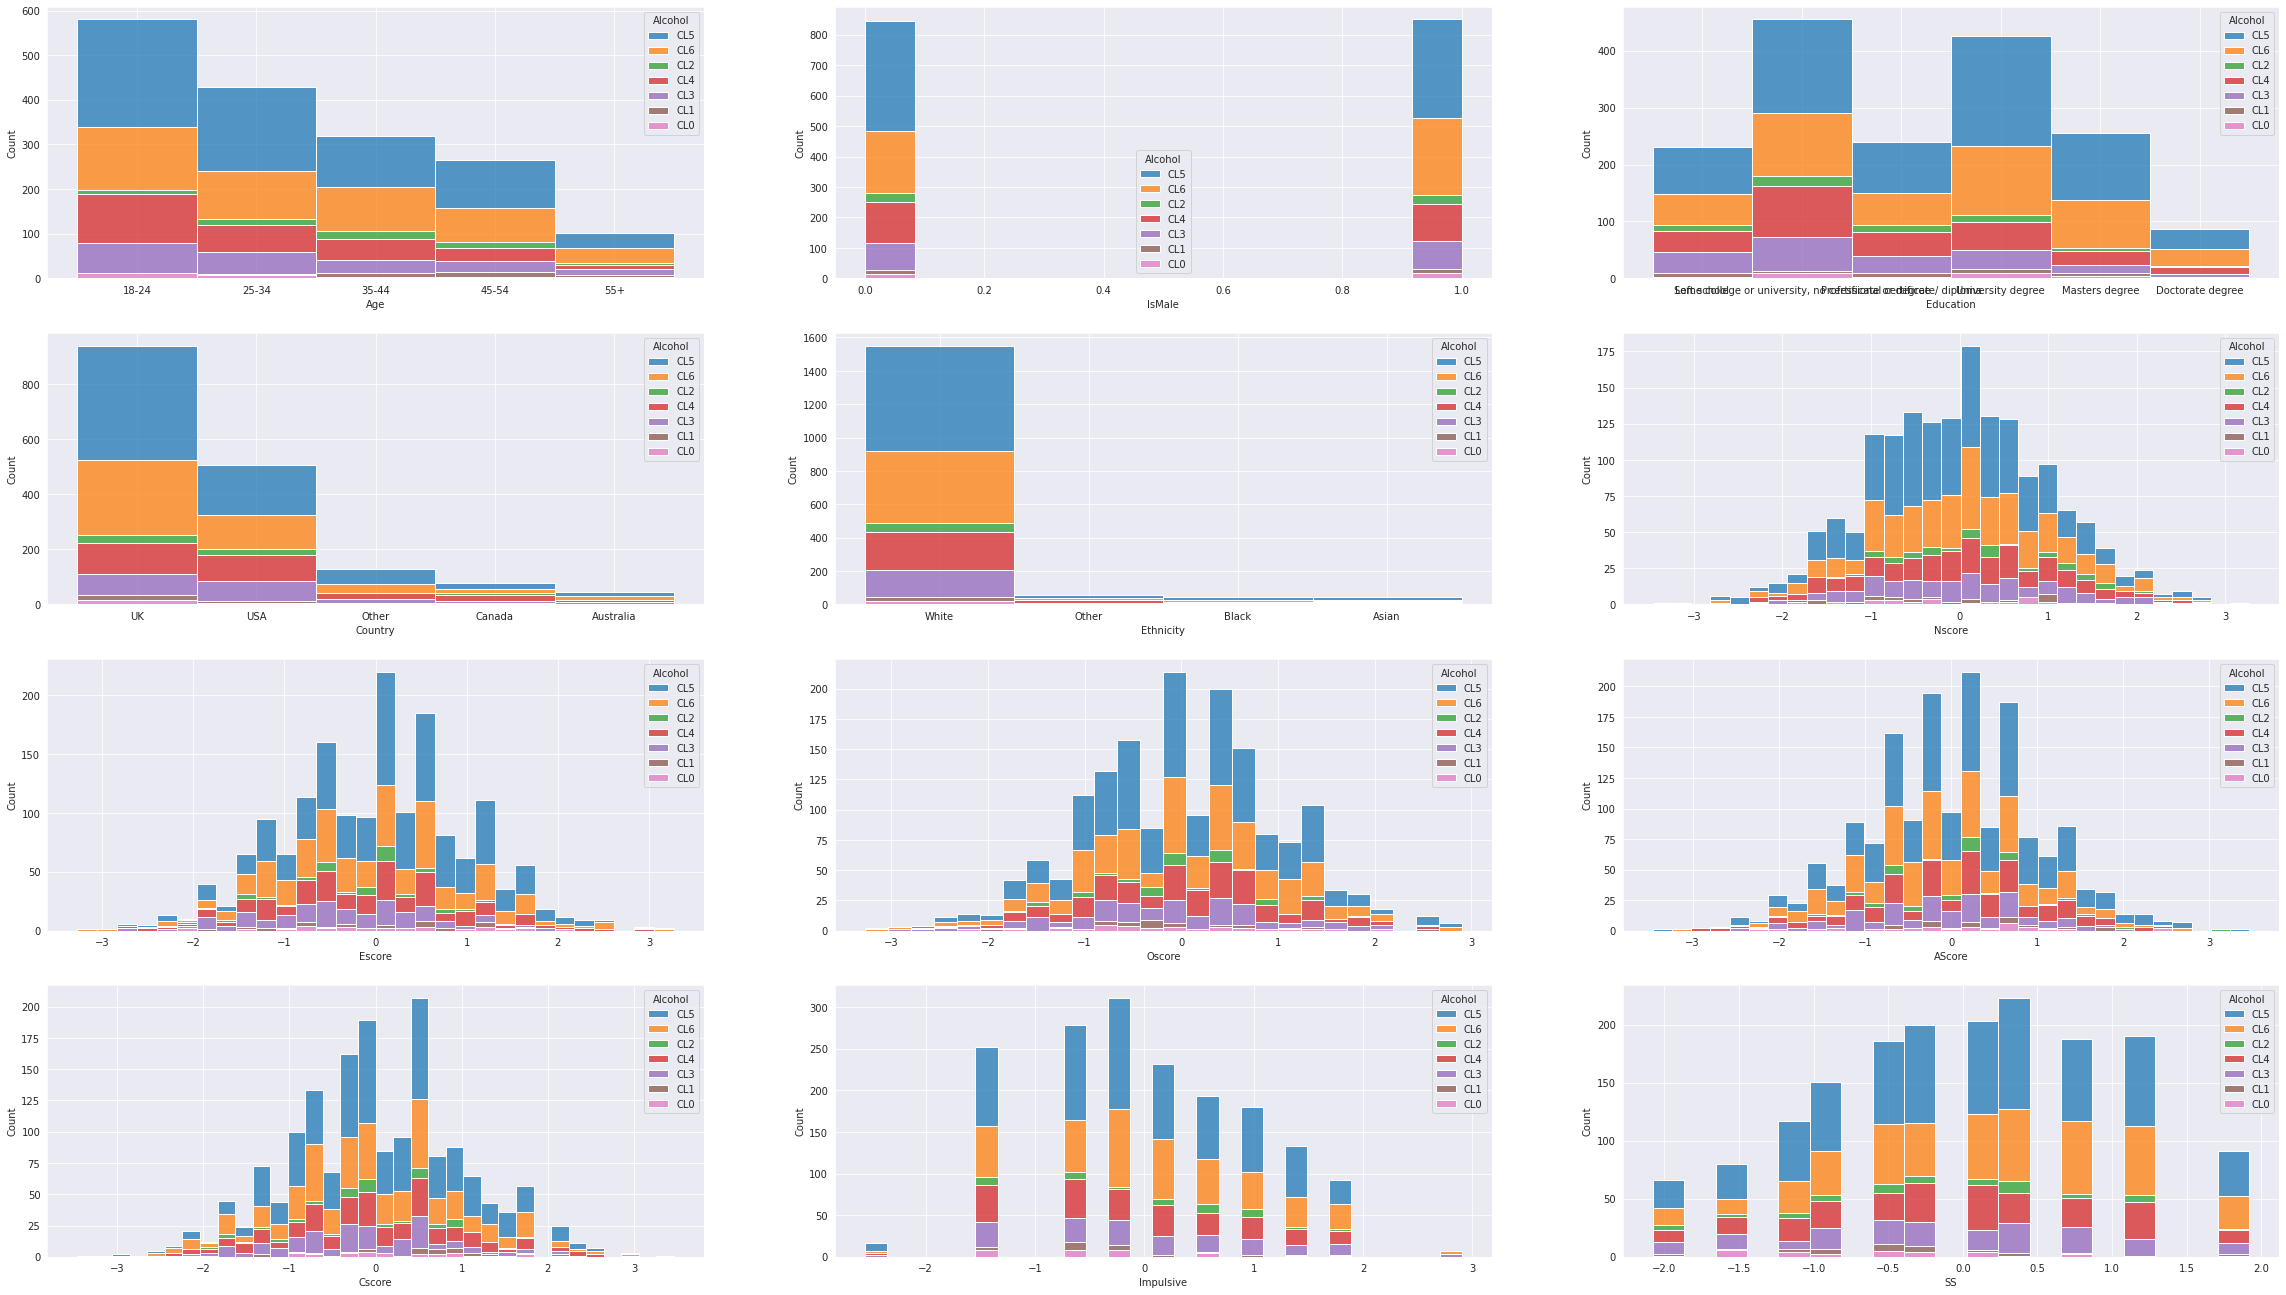

In [39]:
VisualisationTgt('Alcohol')

For the most part our visualisation function worked well, only having some problems with the Country and Ethnicity features, to solve this we will create two dummy dataframes, with all entries of UK and USA removed for country and another one with all entries White for Ethnicity removed, then we can create more detailed visualisations for these features

In [40]:
def detailCnE(target : str):
    CountryDet = train_data.drop(train_data.Country[(train_data.Country == 'UK') | (train_data.Country == 'USA')].index,axis=0)
    EthnicityDet = train_data.drop(train_data.Ethnicity[(train_data.Ethnicity == 'White')].index,axis=0)
    fig, axes = plt.subplots(2,1, figsize=(30, 25))
    sns.histplot(data=CountryDet,hue=target,x='Country',ax=axes[0],multiple='stack')
    sns.histplot(data=EthnicityDet,hue=target,x='Ethnicity',ax=axes[1],multiple='stack')

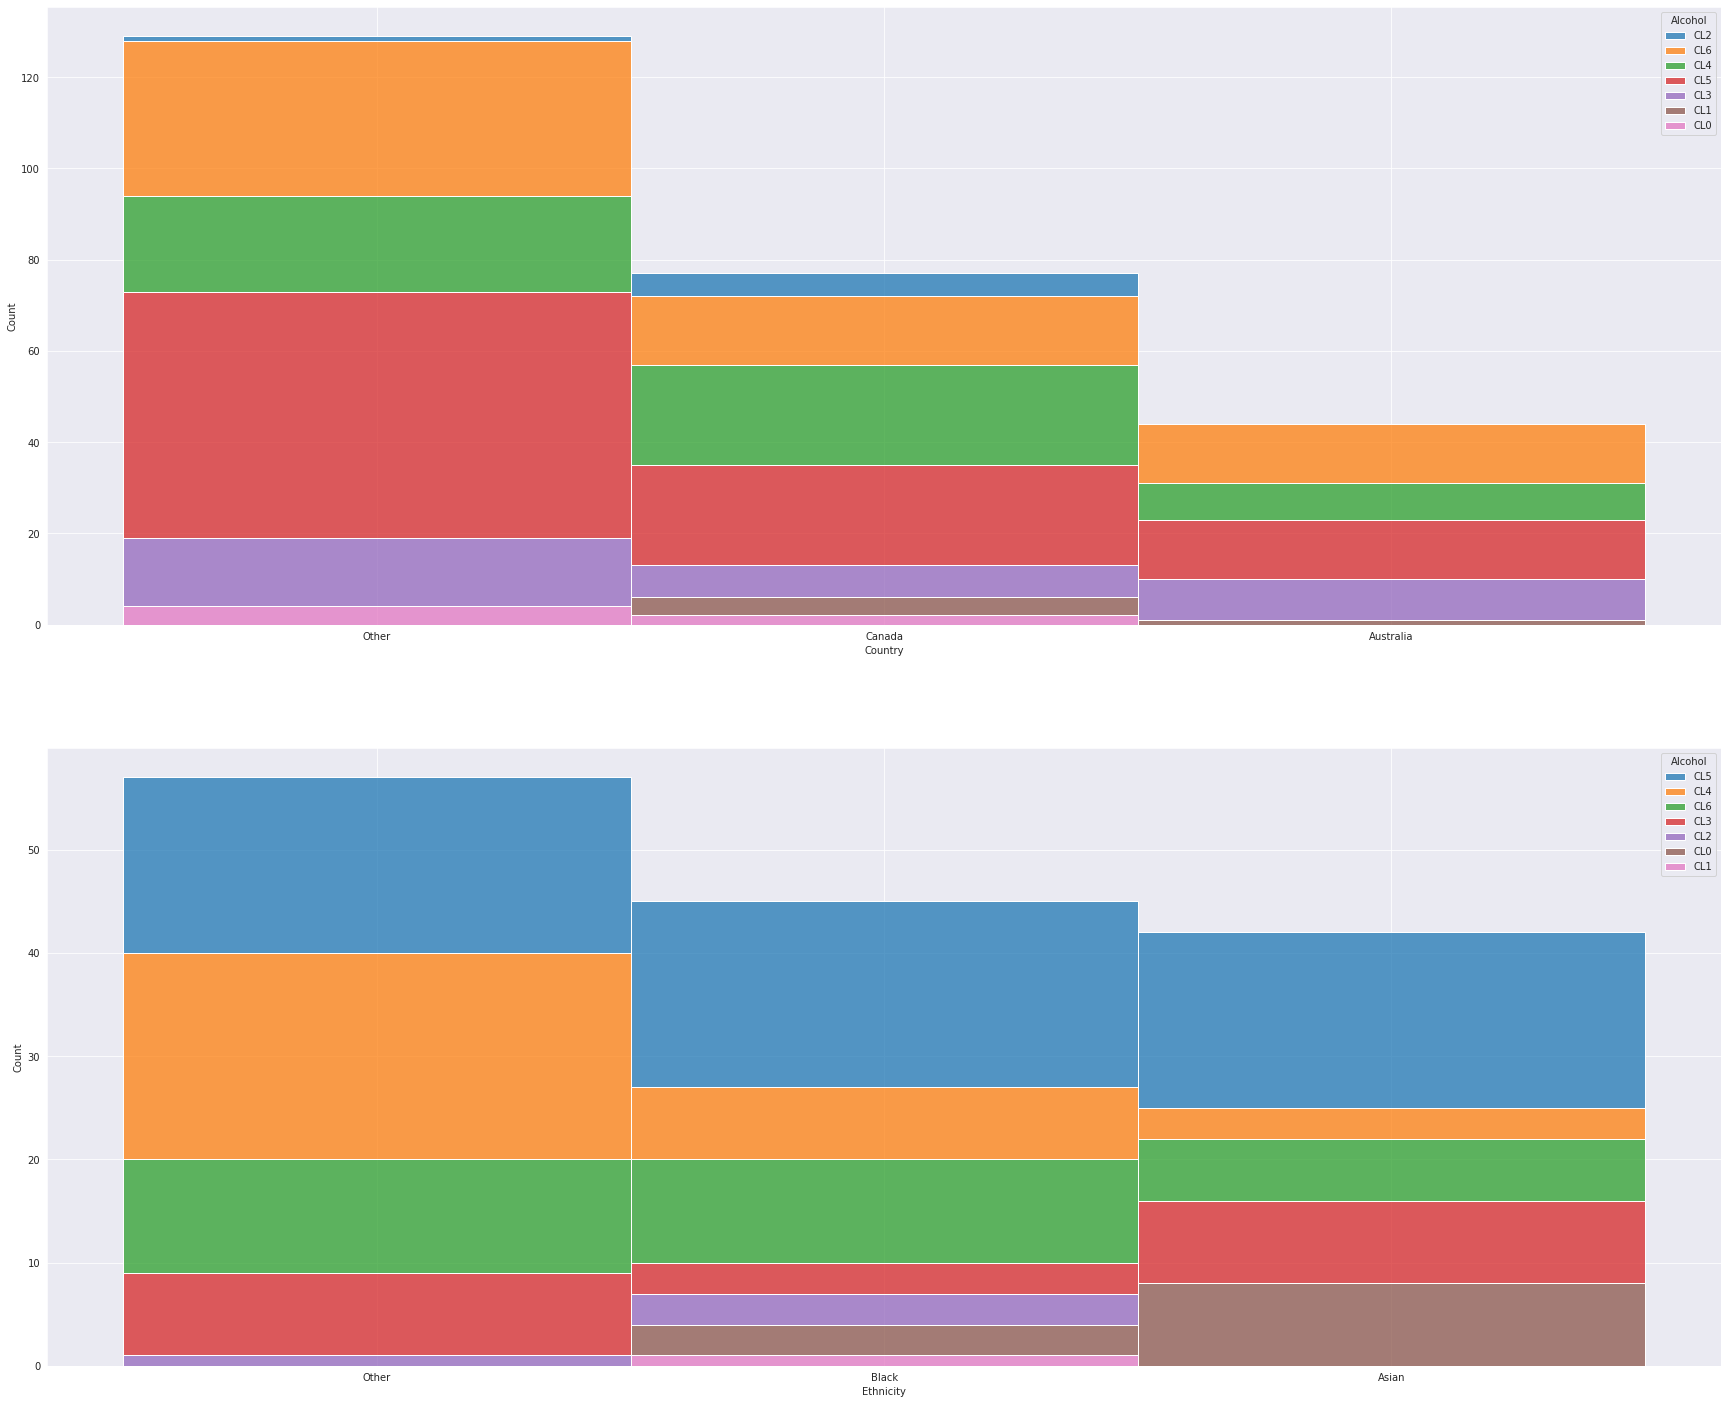

In [41]:
detailCnE('Alcohol')

Now we have a visualization function that works well for every feature.

We will also drop the targets that we are not using, this is to just free up some memory and improve some visualisations later. 

In [42]:
train_data.drop(['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Choc', 'Crack',
       'Ecstasy', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'], axis = 1,inplace = True)

In [43]:
train_data.columns

Index(['Age', 'IsMale', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Caff', 'Coke', 'Heroin'],
      dtype='object')

Now we can just analyse the targets, starting with Alcohol.

# Alcohol

Alcohol, just like all other targets is a categorical feature, with levels varying from A0 to A6, we can start our analysis with the standard visualisations.

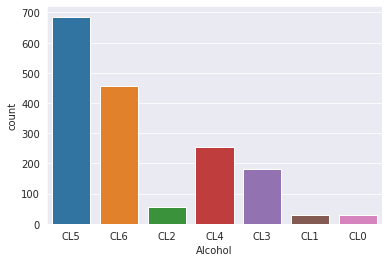

In [44]:
catVisualisation('Alcohol')

As can be seen, CL6 and CL5 are the most common categories, this makes sense and could be expected, as it is legal and fairly common in our society, the distribution is not ideal, but it is not so bad that it justifies altering the original data, it should work without any problems, we can now visualise the relationship with the features.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


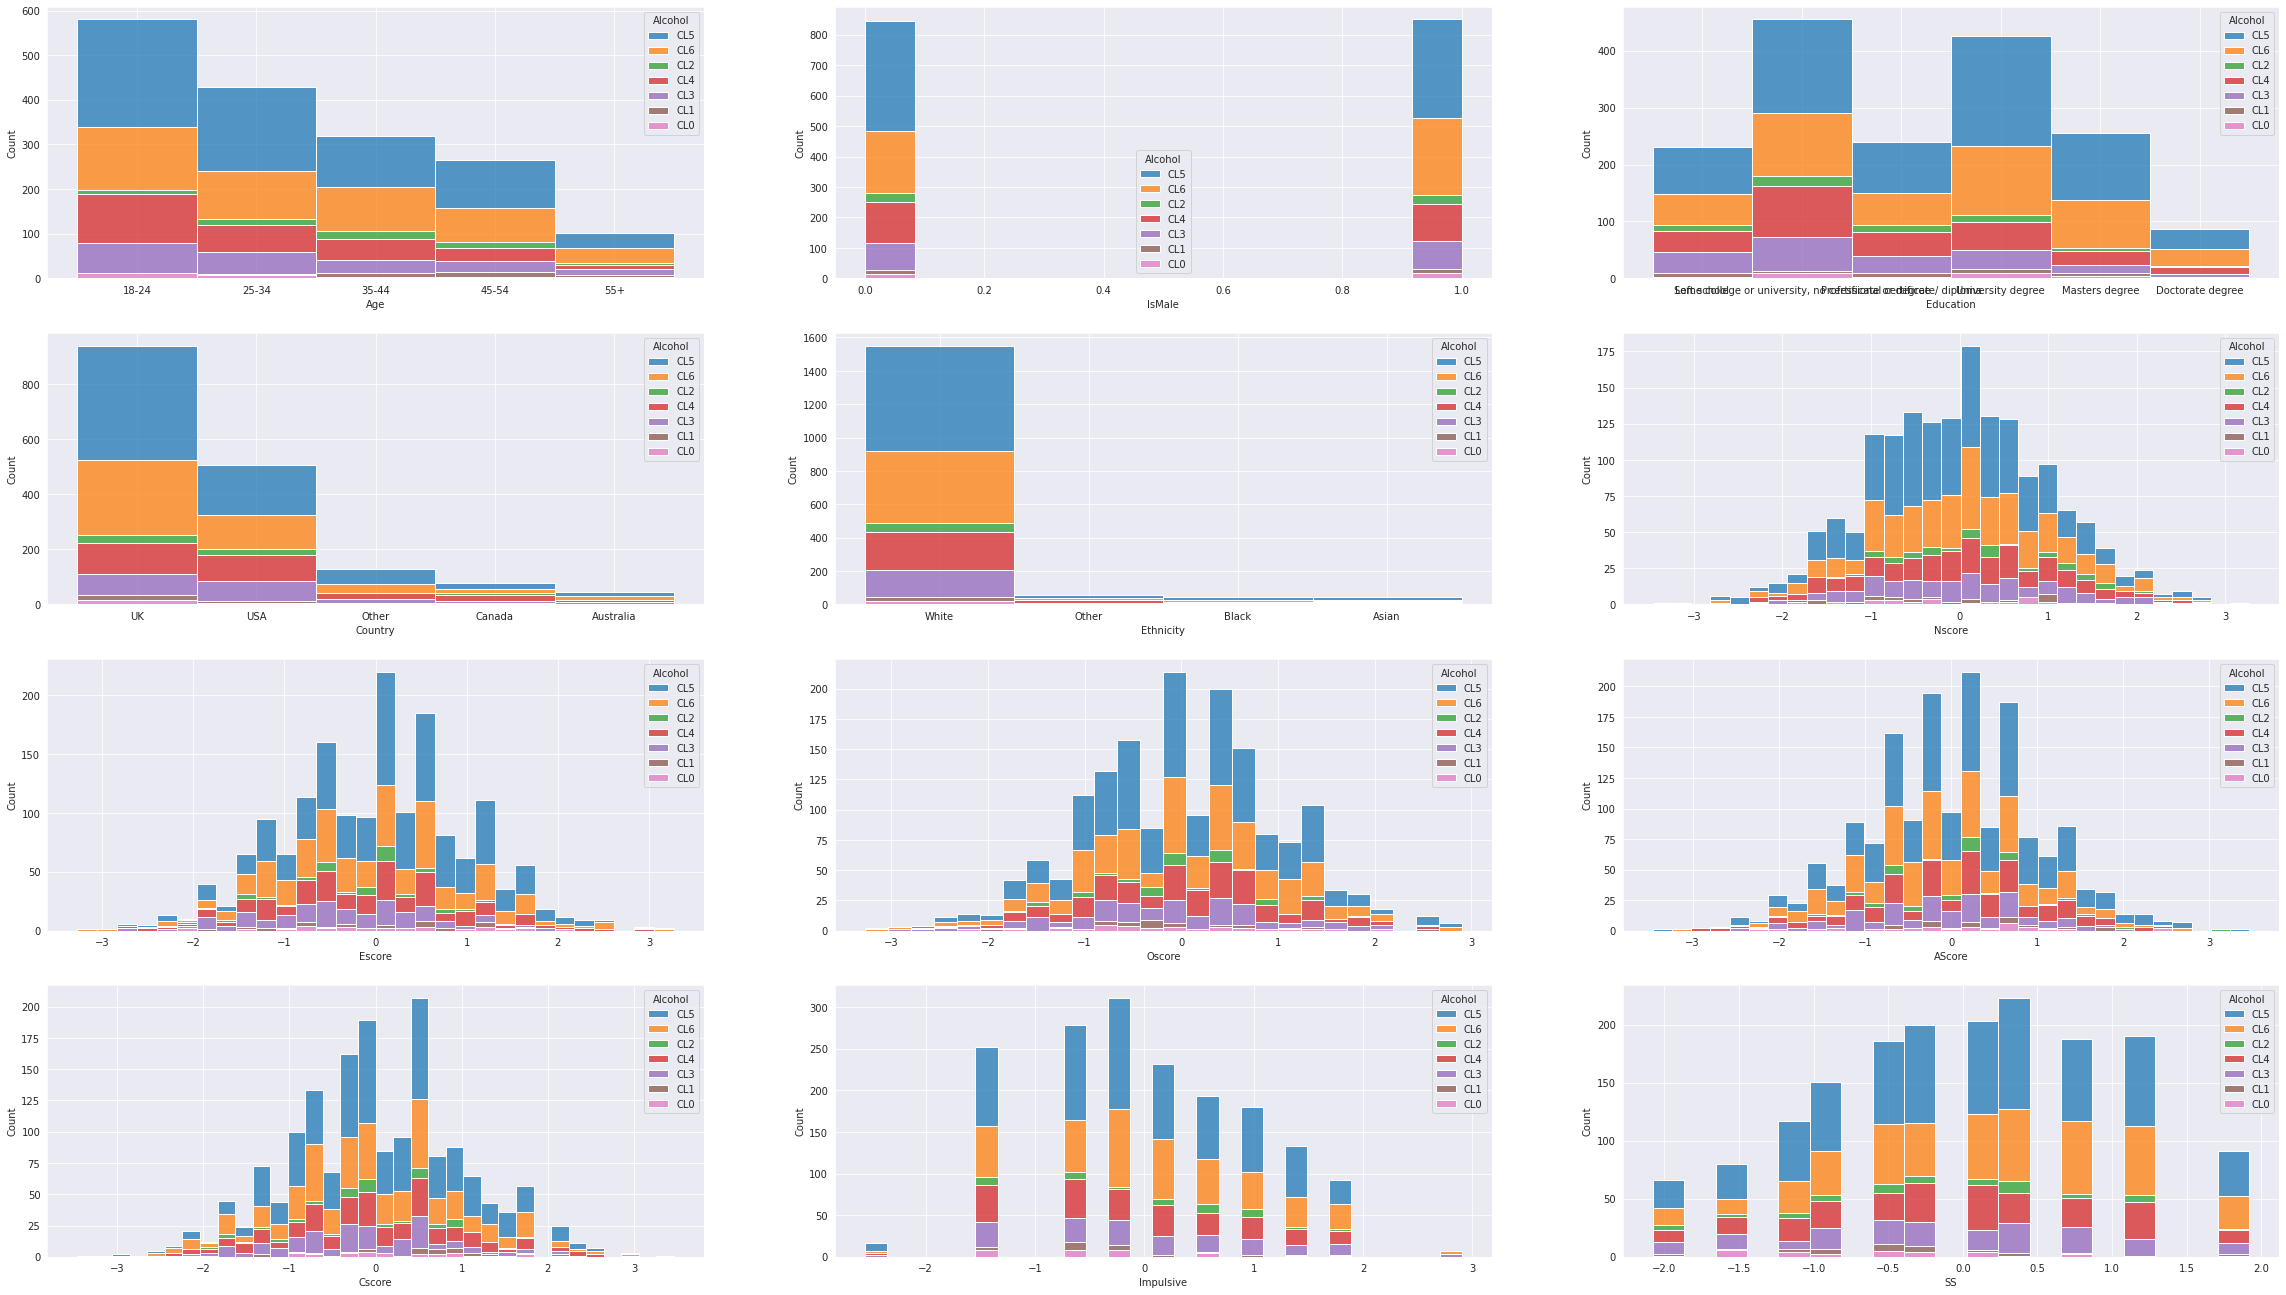

In [45]:
VisualisationTgt('Alcohol')

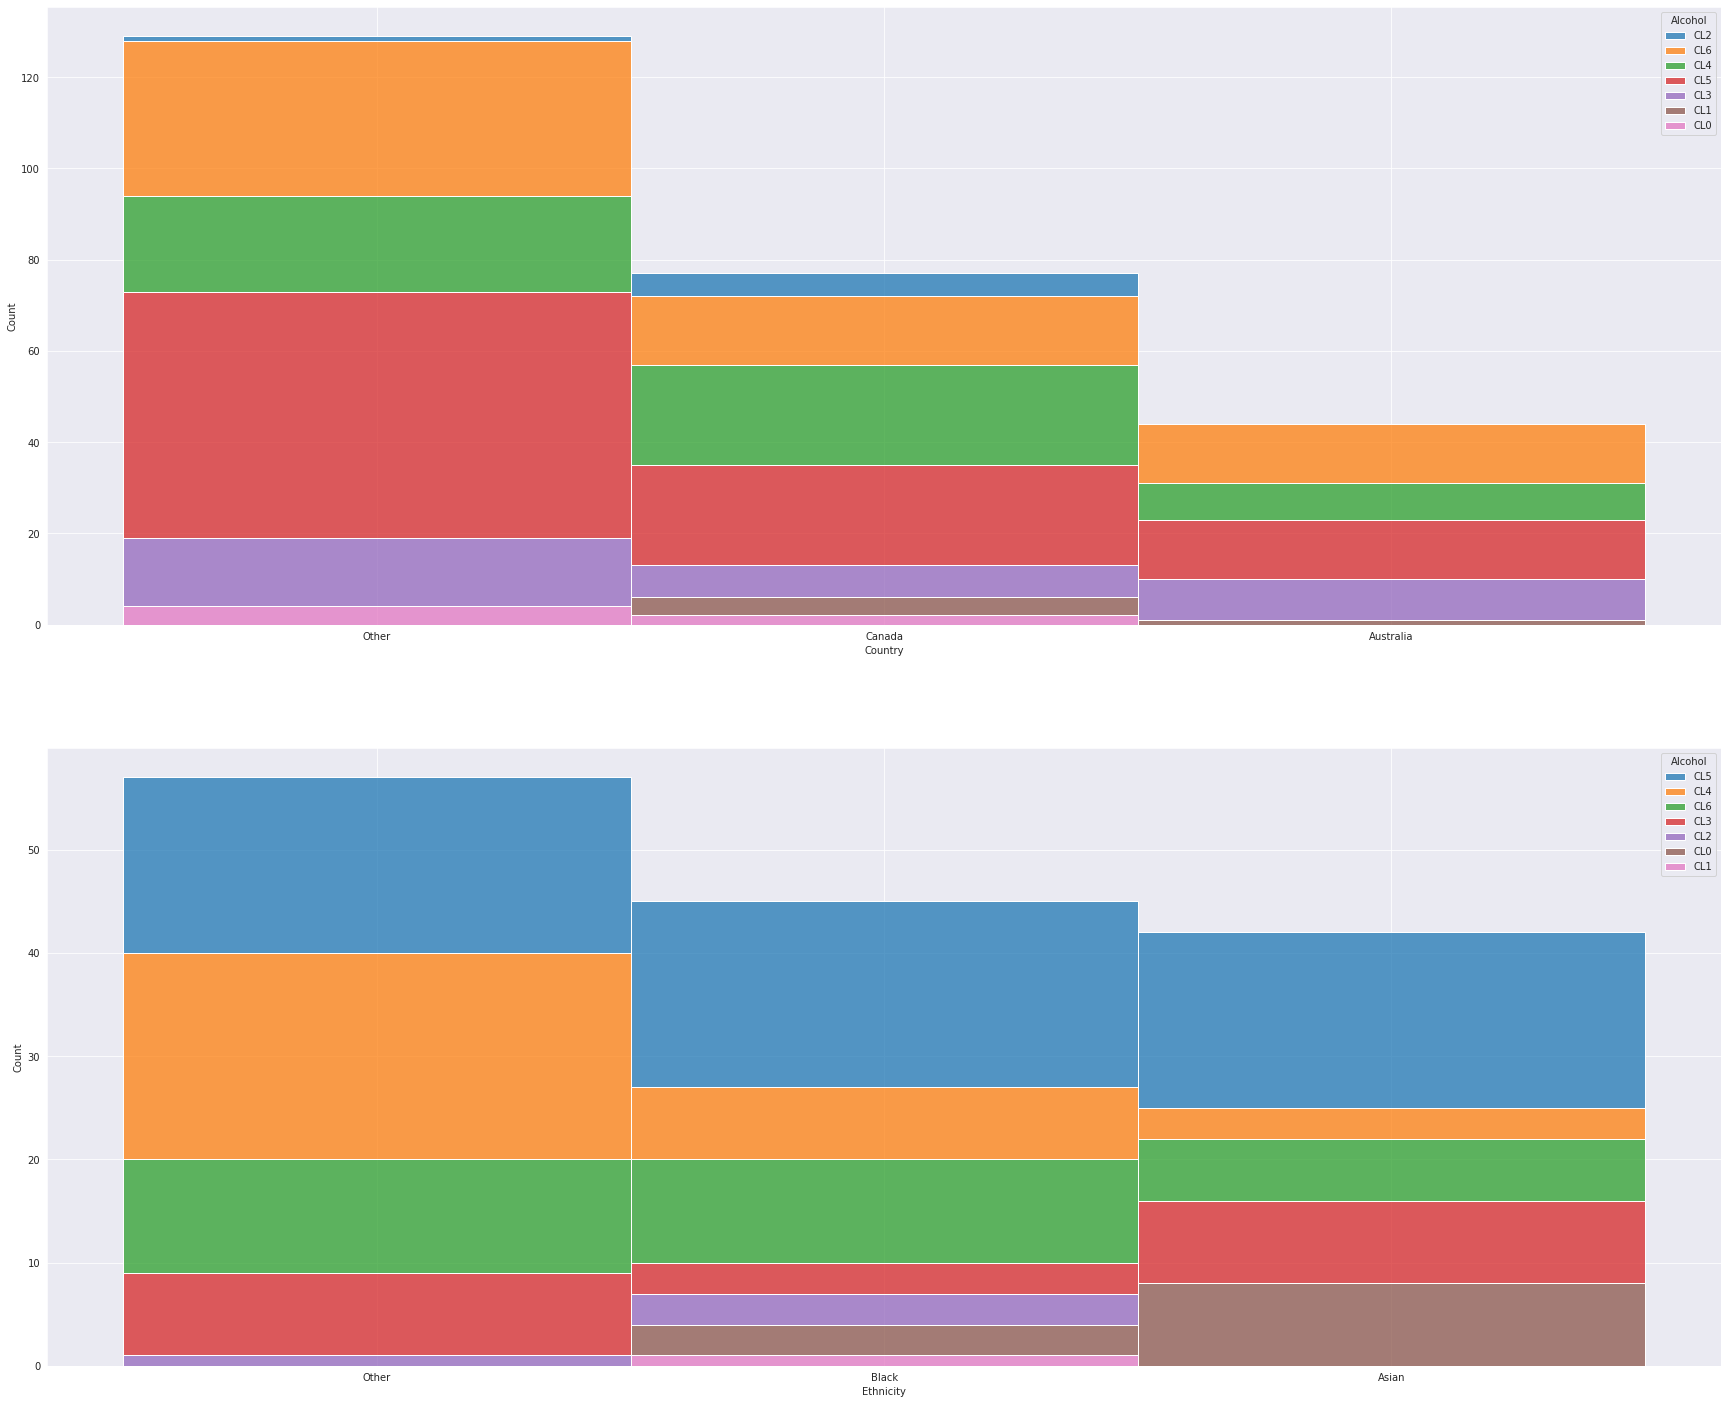

In [46]:
detailCnE('Alcohol')

This target seems very, very hard to predict, being pretty much evenly spread trough all fatures, which again makes sense, alcohol is extremely common in worldwide society, the only few relationships I could notice were, the UK seems to have a slightly higher on average alcohol consumption, and possibly higher consumption on the younger population, but its hard to say anything definitive from the visualisations, maybe the correlations matricies will reveal something clearer, but we will check that later, for now we can go to the next target of Caff.

# Caff

Caff just refers to the consuption of caffeine and works just like all other targets, we can just start with our general visualisations.

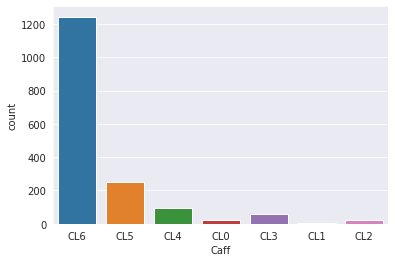

In [47]:
catVisualisation('Caff')

This distribution is bad in the same way that alcohol was, that is, it is mostly concentrated on CL6 and CL5, but even more so, with further concentration on CL6, but again, there shouldn't be any major problems due to it.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


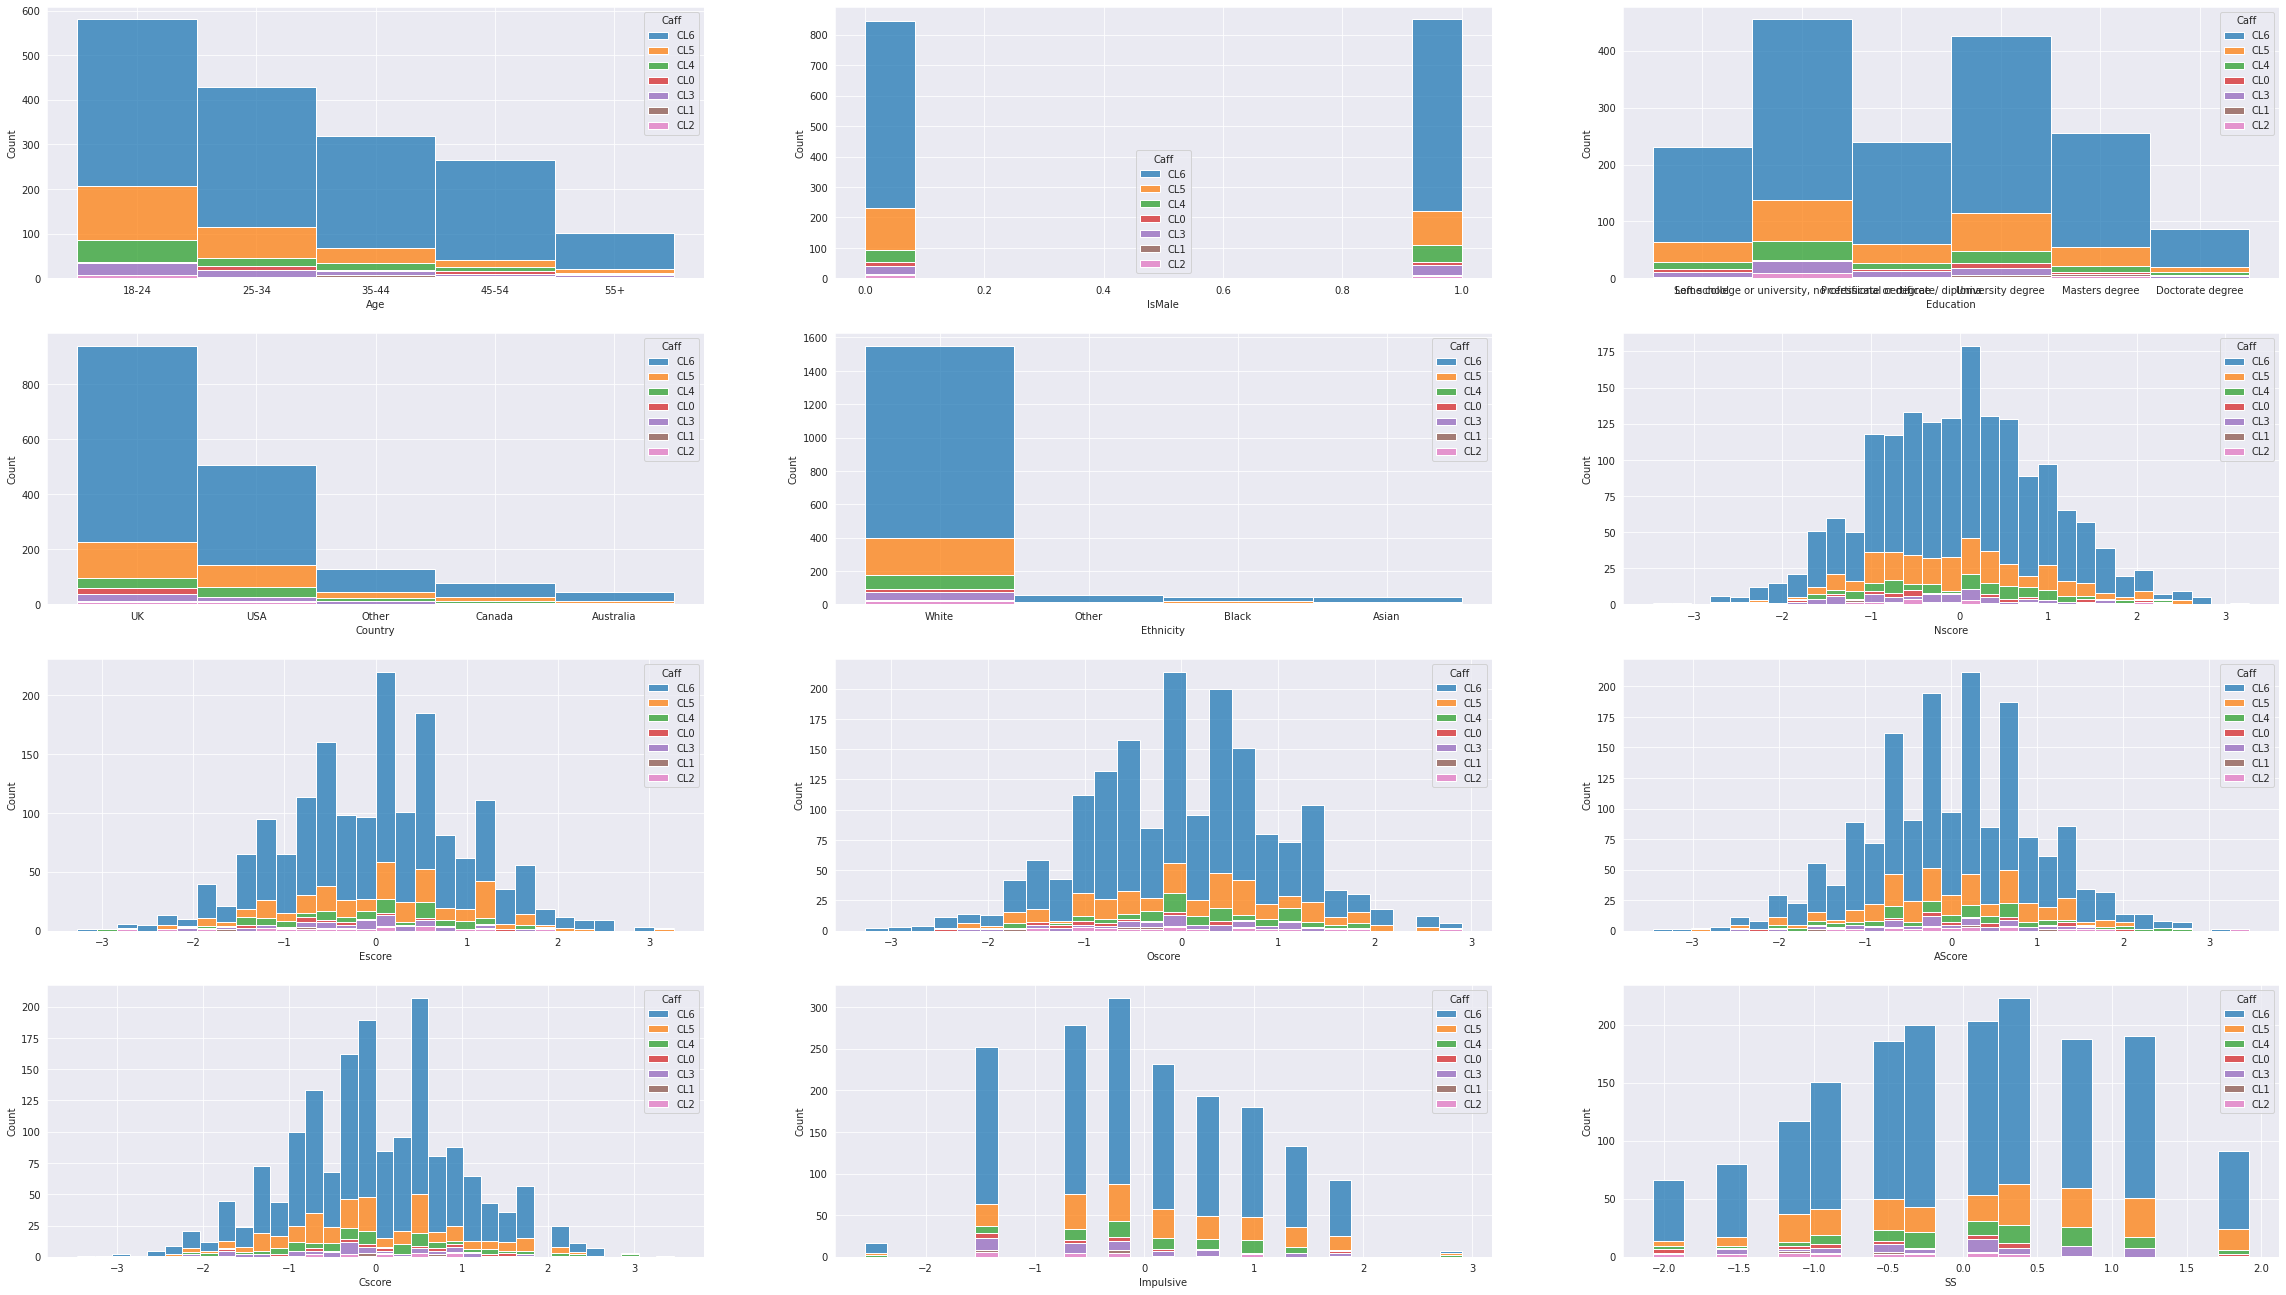

In [48]:
VisualisationTgt('Caff')

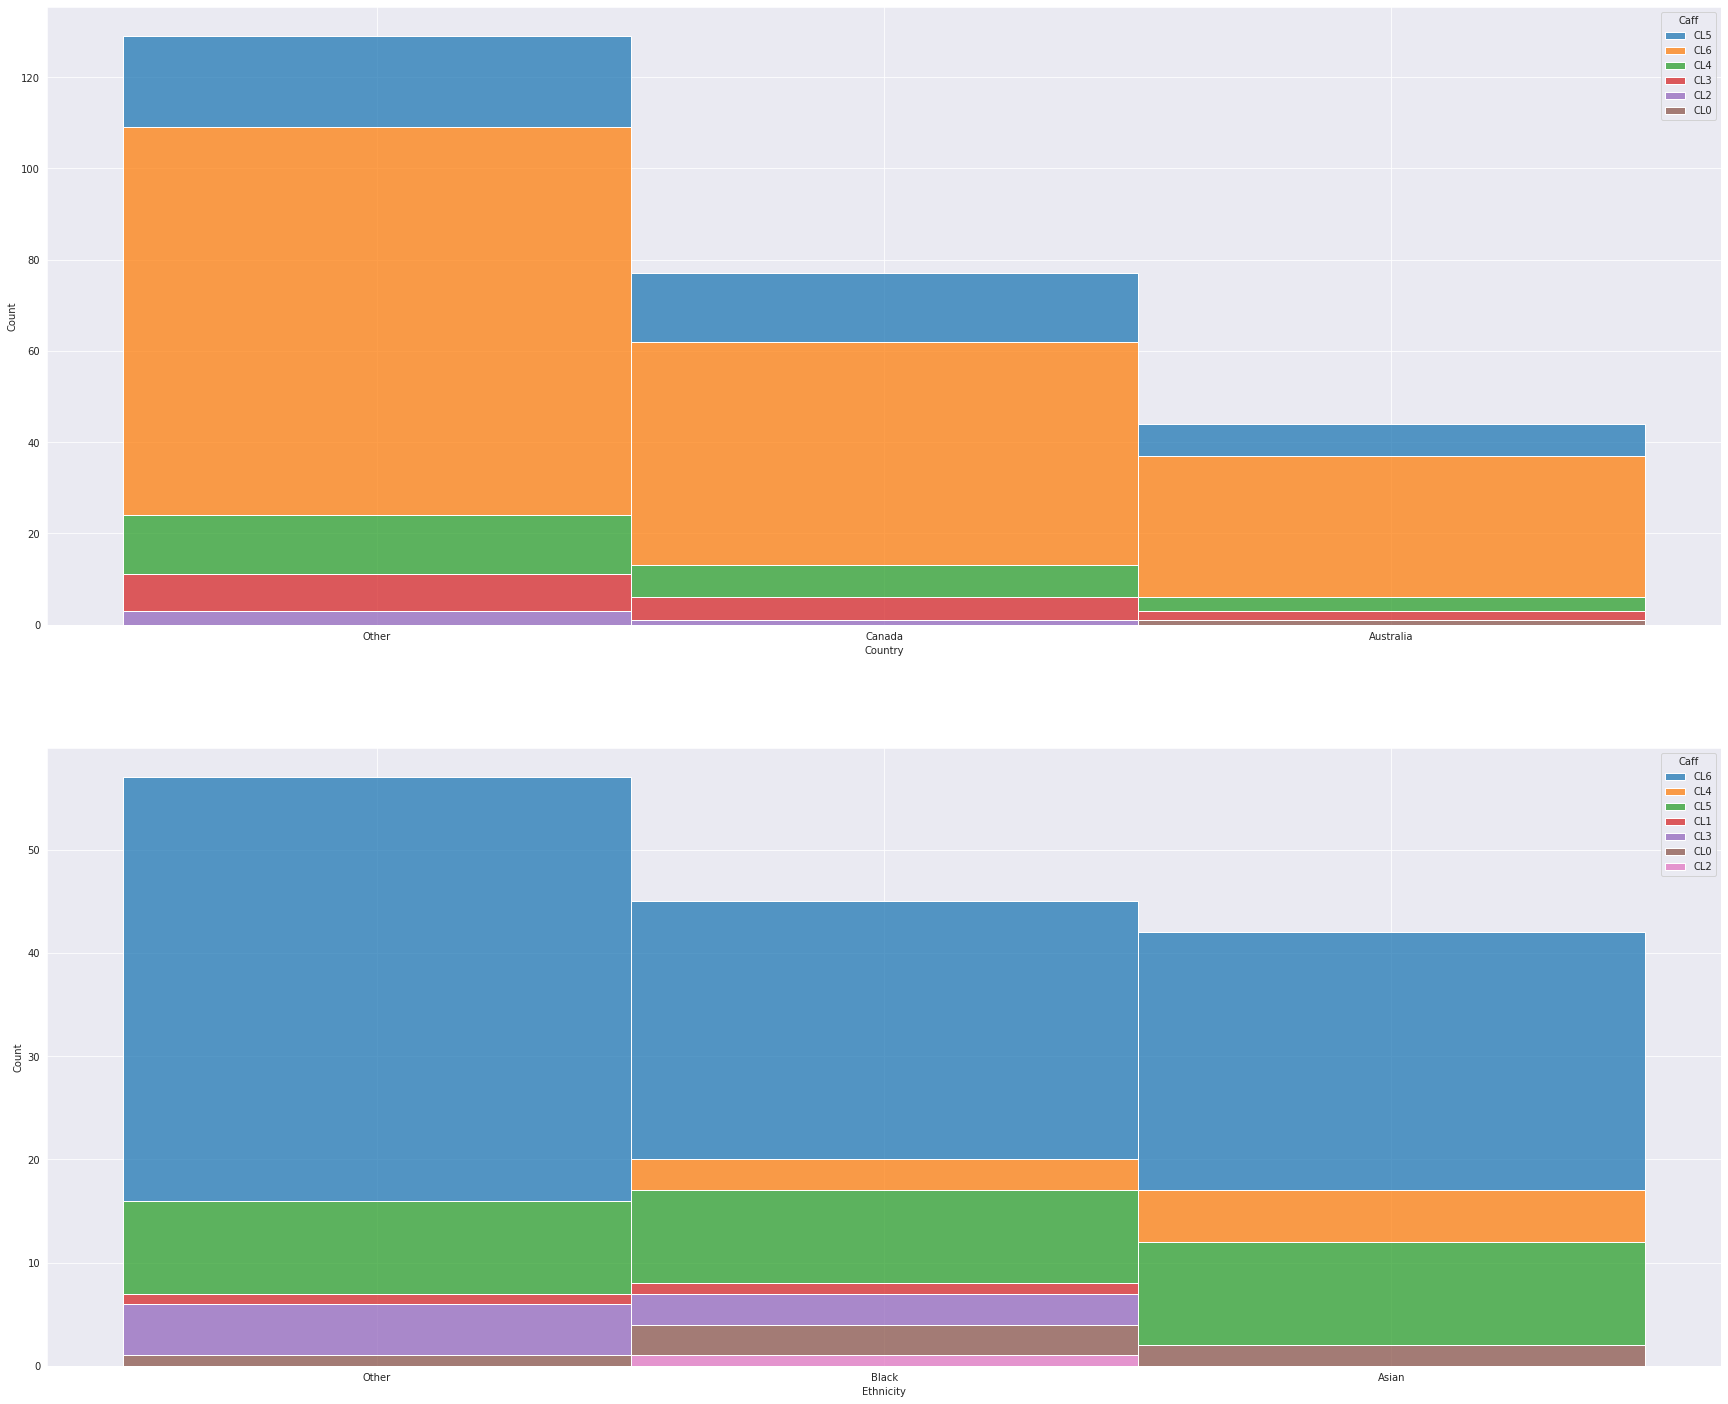

In [49]:
detailCnE('Caff')

Again, it is a bit hard to notice any strong trends, caffeine might even be more common in society than alcohol, being present even in many foods we eat like chocolate, and in many traditional beverages, such as coffee and tea, the UK again seems to have a slightly higher consumption level when compared to other countries, but it's even harder to say anything, again the hope lies on the correlation matricies, for now we can go to the next target of Coke.

# Coke

Coke works like all other targets, just refering to cocaine consumption, no not the soda, we can start with our standard visualisations.

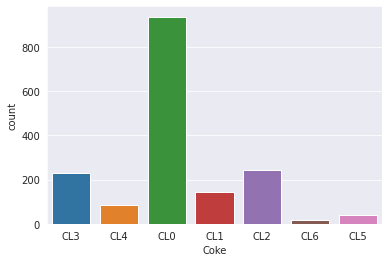

In [50]:
catVisualisation('Coke')

The distribution seen is basically the oposite of the one for the previous targets, with most respondats answering that they never had it, but it shouldn't be a problem and should be expected of a 'hard' drug.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


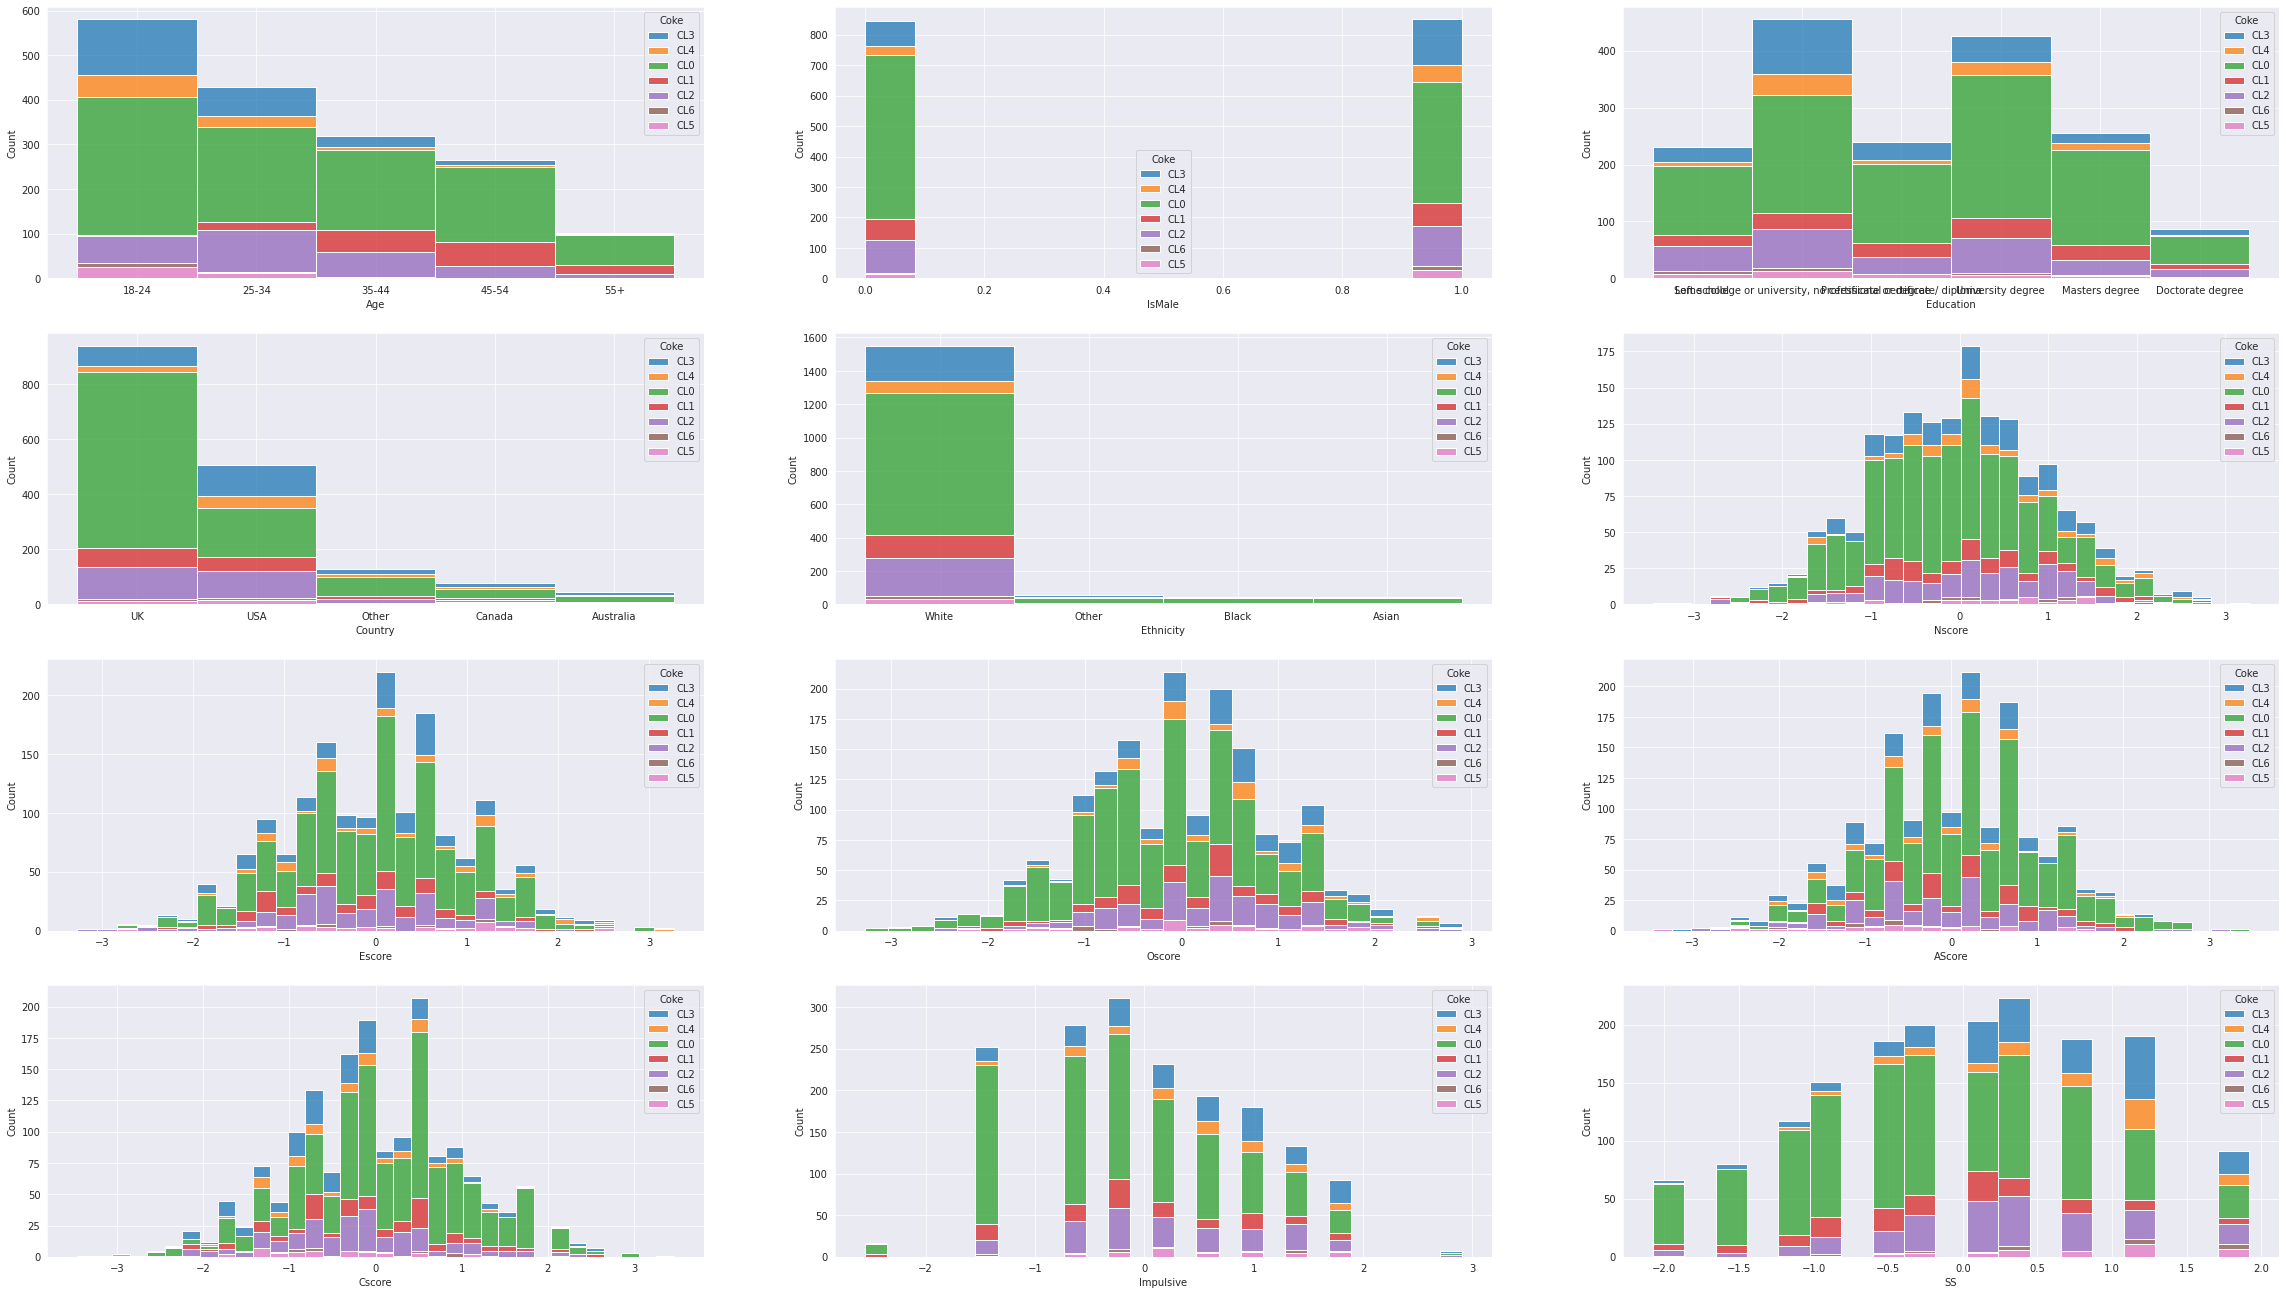

In [51]:
VisualisationTgt('Coke')

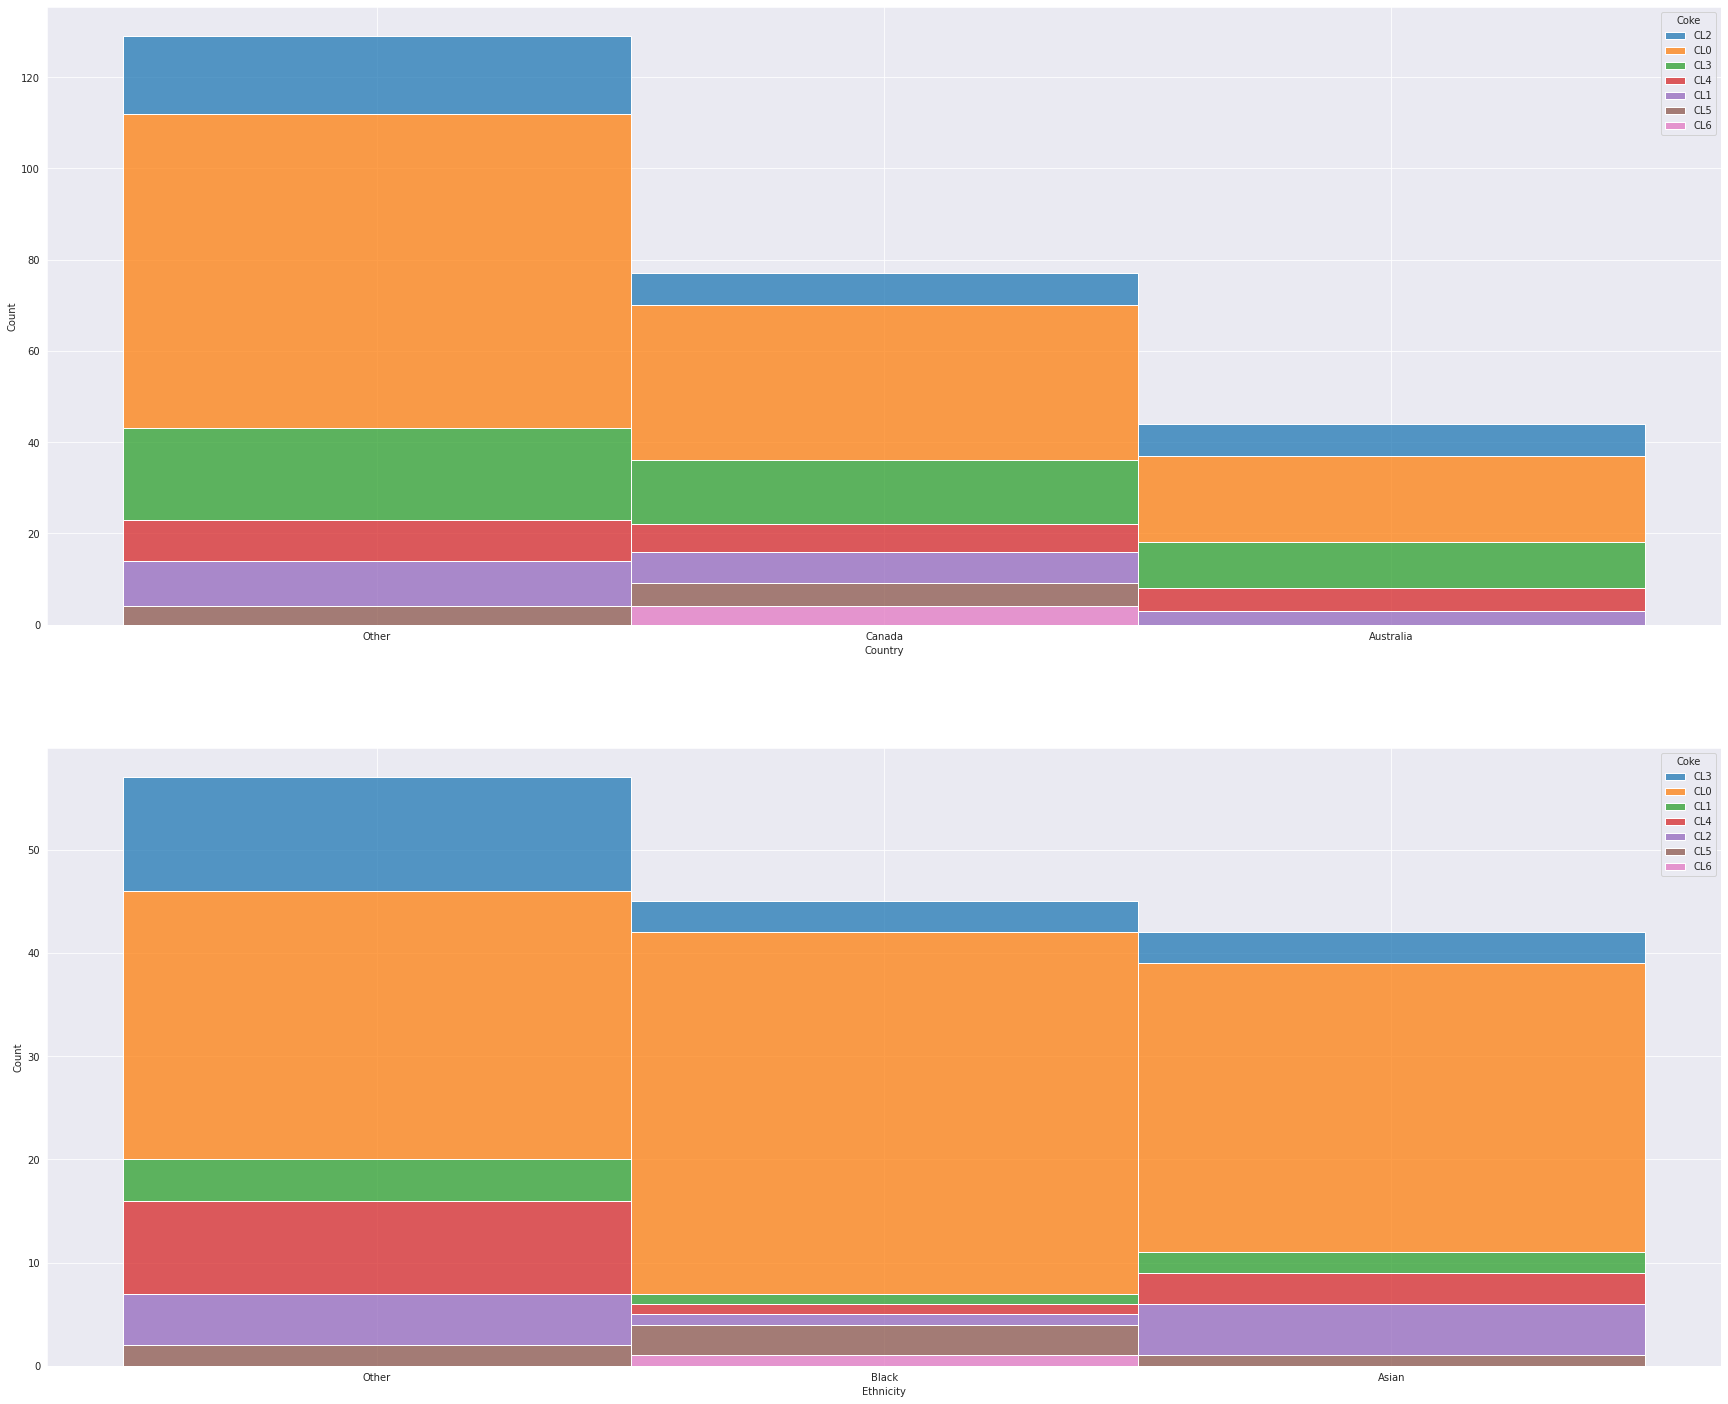

In [52]:
detailCnE('Coke')

There seems to be a slight correlation with the "some university/college but no degree" level of education as well as the american popualtion seeming to have higher consumption levels on average, as well as most of the numerical features seeming to have some correlation, we can now go to the last target of Heroin

# Heroin

Heroin again works the same, we can just start with the normal visualisations.

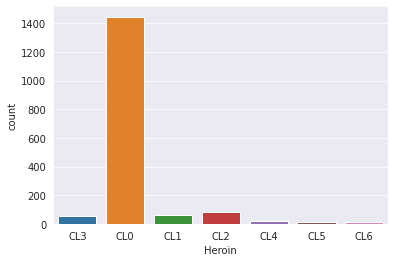

In [53]:
catVisualisation('Heroin')

With Heroin it is even more skewed towards CL0, being a even more 'harder' drug it is no surprise, again there is no way of taking out that ske without distorting the data completely, so let us jsut go the relationship analysis.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


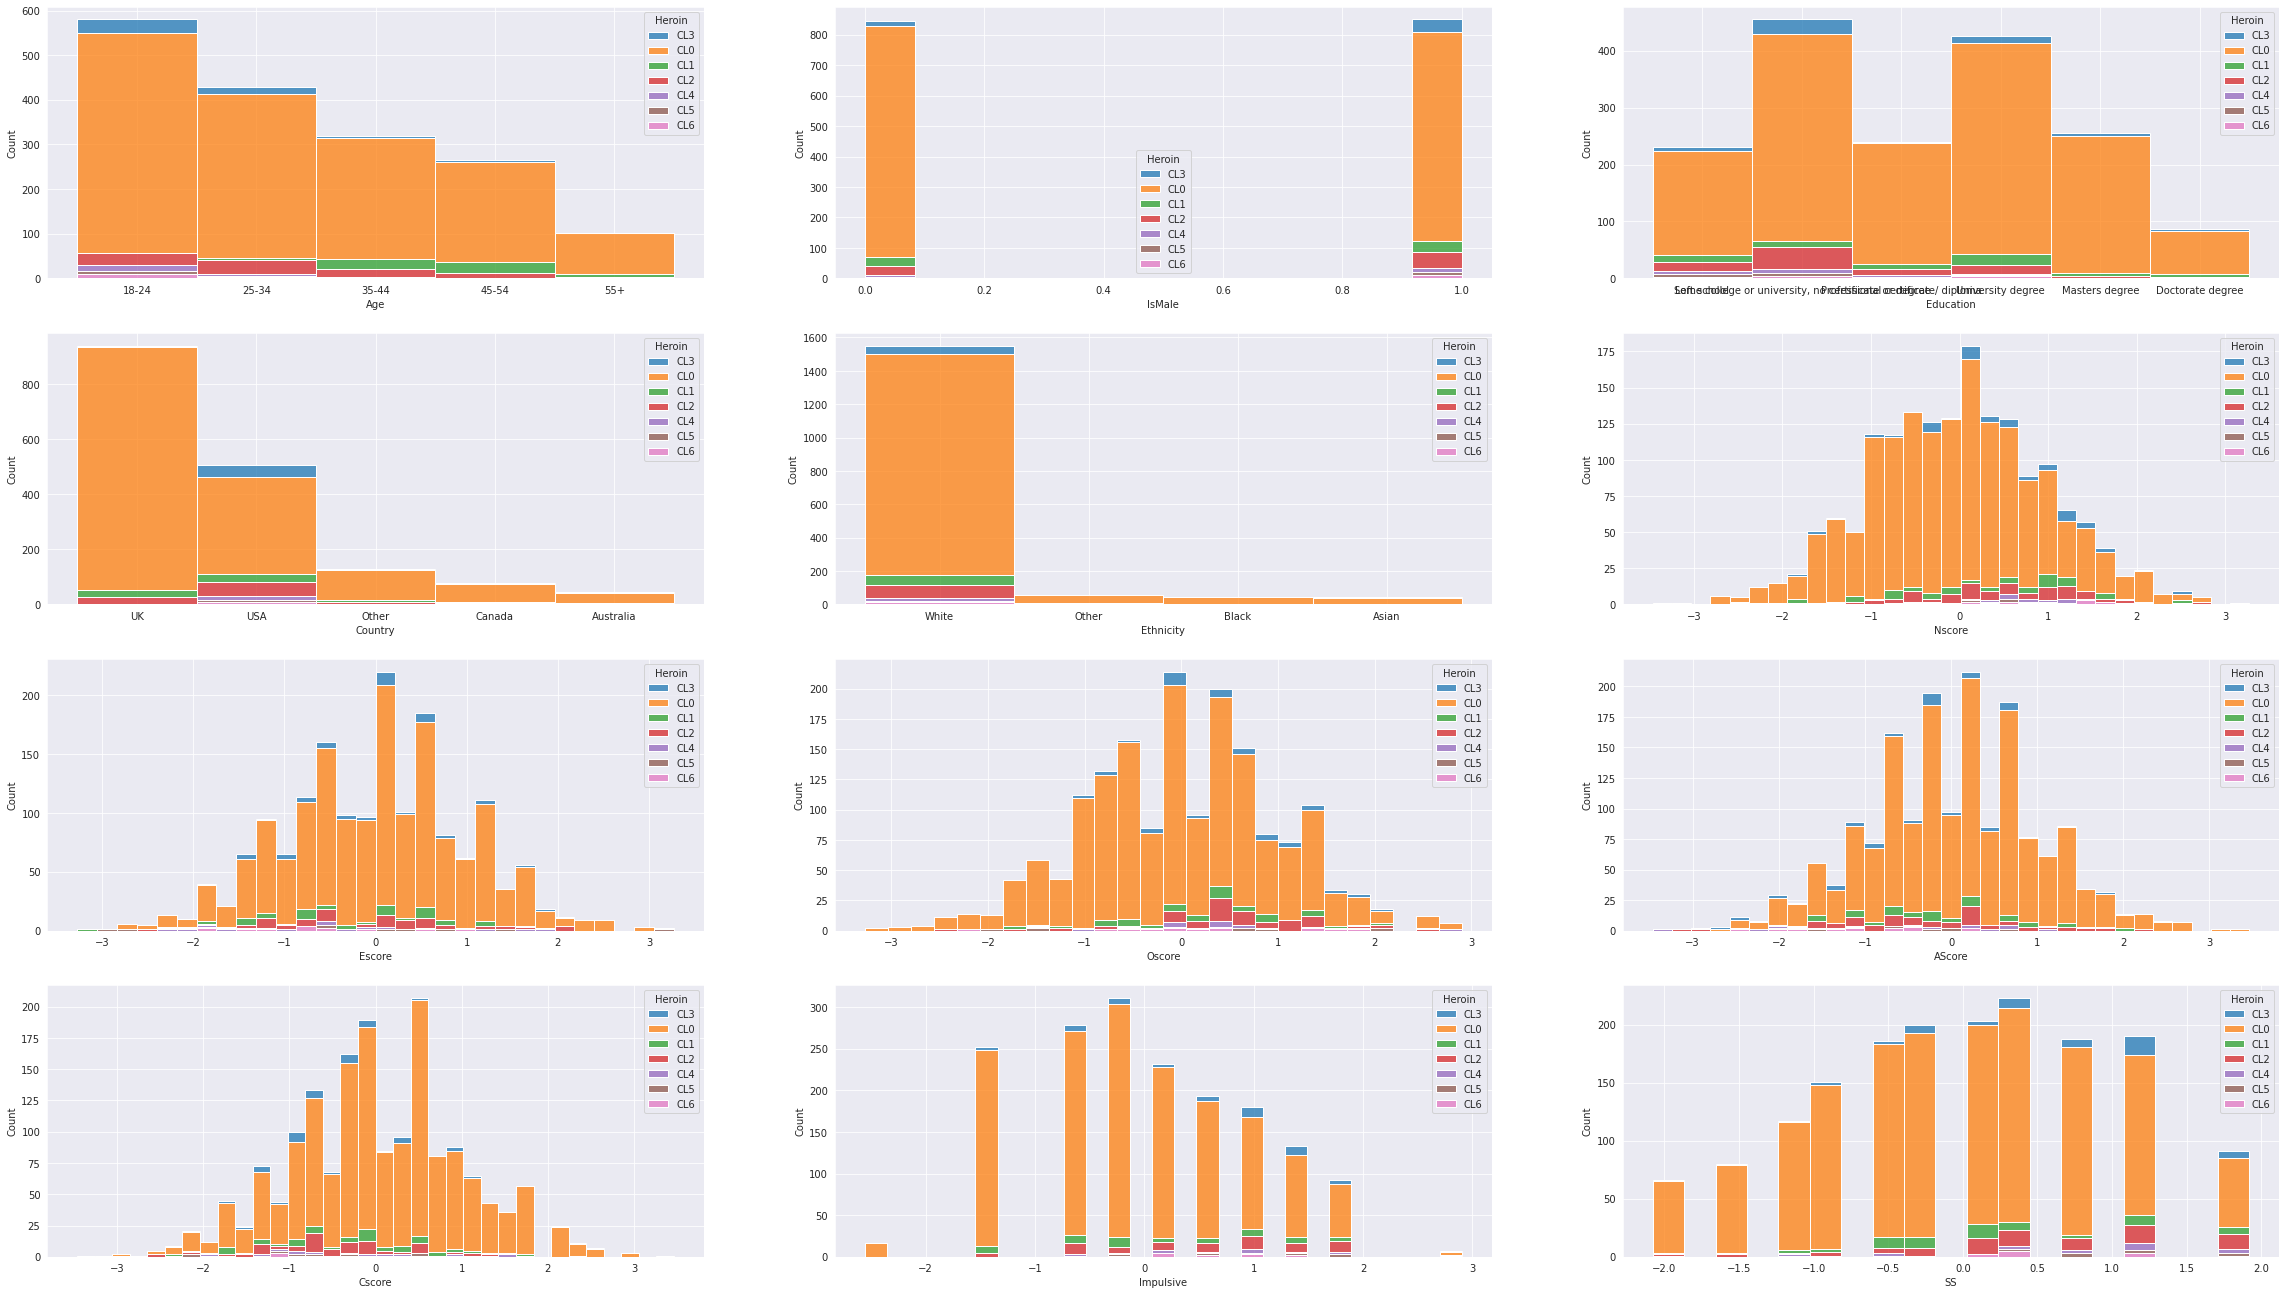

In [54]:
VisualisationTgt('Heroin')

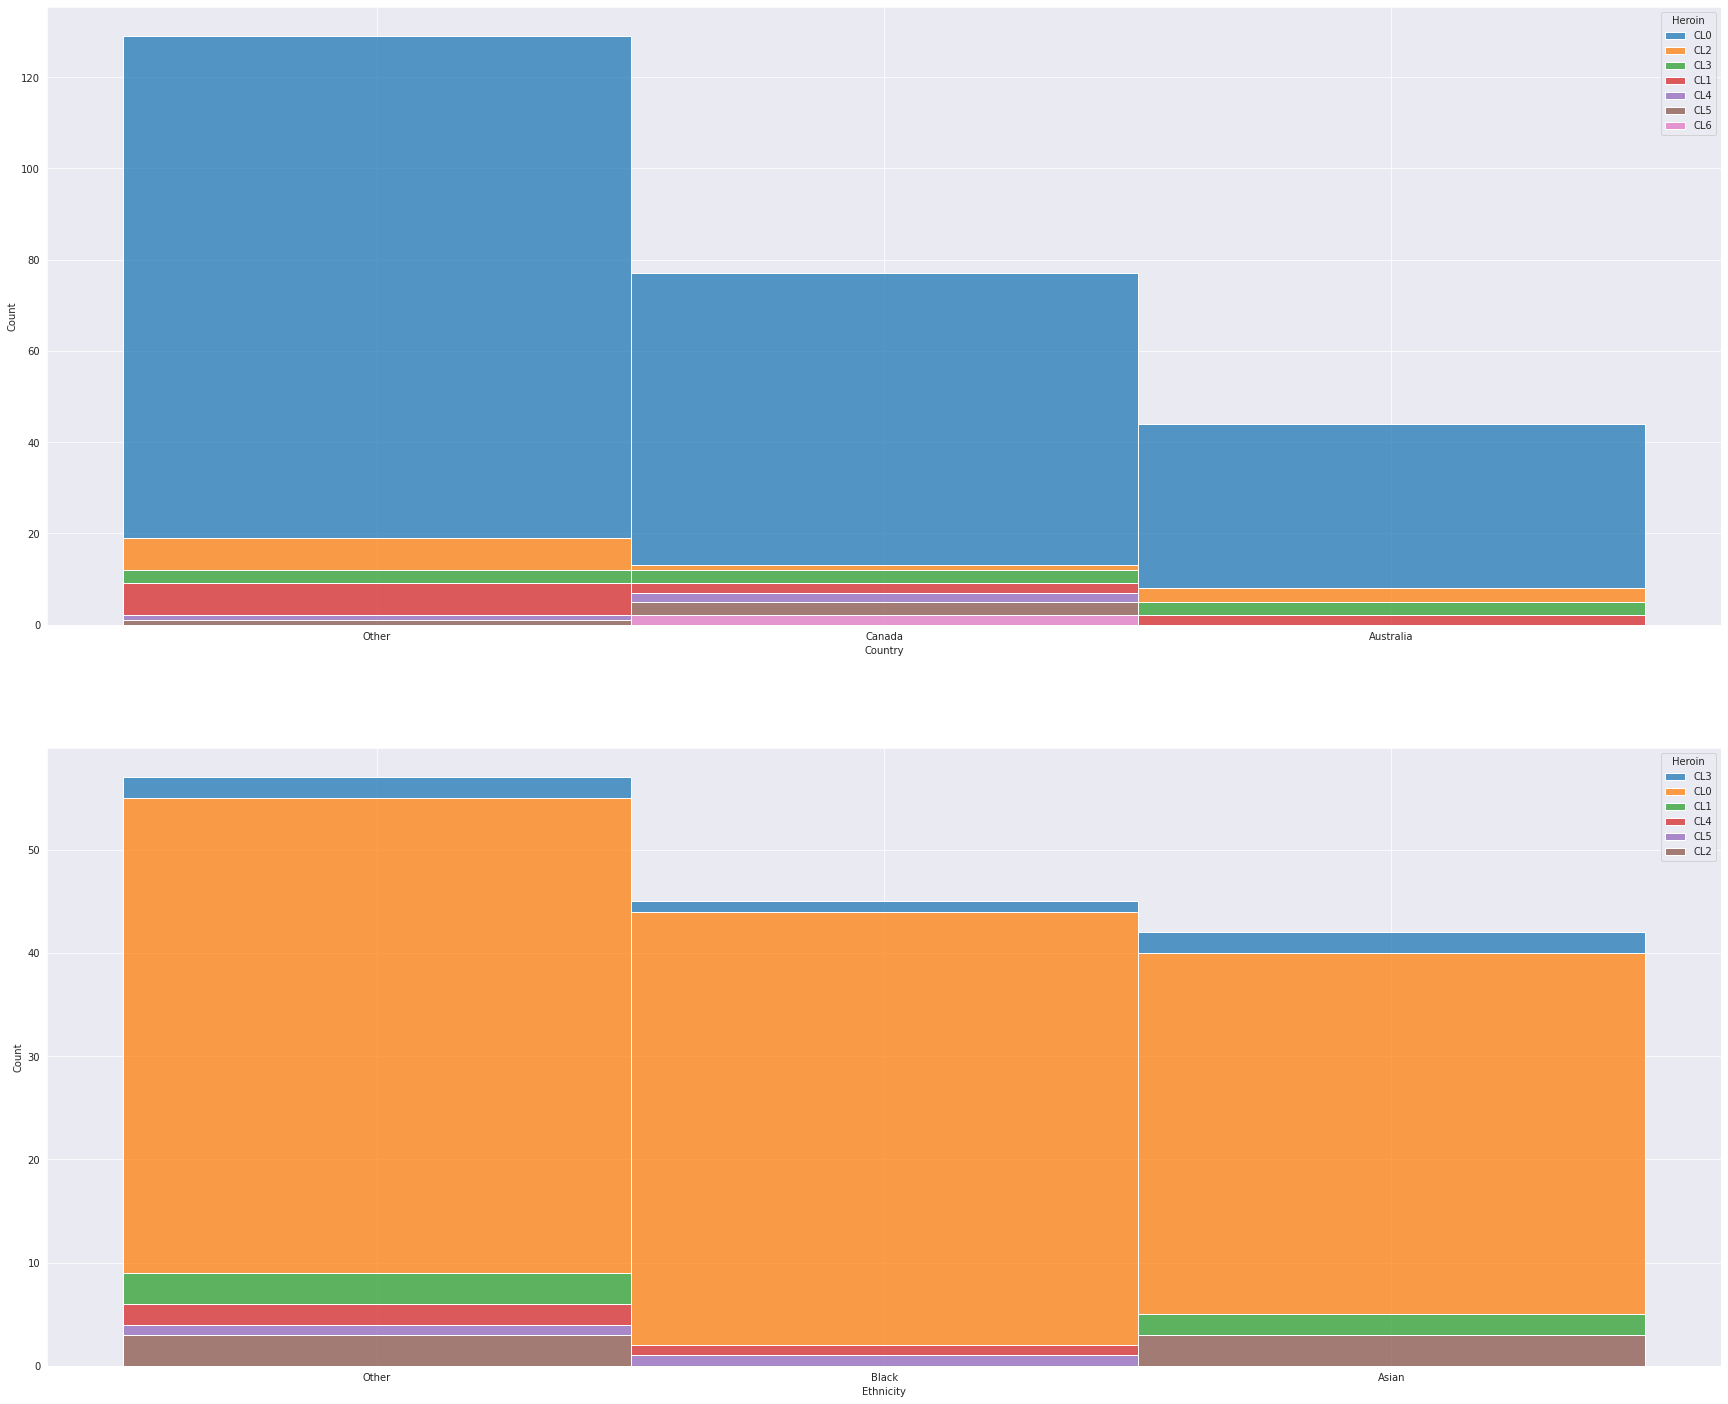

In [55]:
detailCnE('Heroin')

The US and Canada seems to have a higher consumption level for heroine, that makes sense to the the Opiod epidemic present there, Heroin being an opioid, there seems to be also a higher level of consumption in Males aswell, along with the numerical features again seeming to be good predictors.

# Correlation matricies

# Phik

The only correlation calcualtion method we can use is the Phik, since it gives us correlation between categorical features, and our targets are categorical, so we can start by just getting the correlation matrix.

In [56]:
import phik
columns = train_data.columns
corr = train_data[columns].phik_matrix()

alcScores = corr[['Alcohol']] #saving the correlation indexes for our targets
cafScores = corr[['Caff']]
cokScores = corr[['Coke']]
herScores = corr[['Heroin']]


corr

interval columns not set, guessing: ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']


,Age,IsMale,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Caff,Coke,Heroin
Age,1.000000,0.157544,0.336761,0.467997,0.000000,0.158118,0.026672,0.298784,0.051068,0.240382,0.194208,0.393848,0.134799,0.156648,0.299373,0.188265
IsMale,0.157544,1.000000,0.351454,0.182869,0.000000,0.081917,0.043902,0.192337,0.273507,0.252954,0.198093,0.340624,0.035841,0.045677,0.165895,0.118620
Education,0.336761,0.351454,1.000000,0.330170,0.054451,0.102044,0.081609,0.208331,0.000000,0.245732,0.168341,0.211717,0.120498,0.042186,0.126855,0.118357
Country,0.467997,0.182869,0.330170,1.000000,0.070502,0.165258,0.126810,0.387051,0.186913,0.274567,0.216983,0.399416,0.130025,0.091333,0.247340,0.247482
Ethnicity,0.000000,0.000000,0.054451,0.070502,1.000000,0.000000,0.000000,0.078190,0.000000,0.000000,0.057434,0.074277,0.197961,0.101818,0.095516,0.000000
Nscore,0.158118,0.081917,0.102044,0.165258,0.000000,1.000000,0.486902,0.037048,0.294529,0.477263,0.174353,0.115058,0.000000,0.070471,0.122085,0.140546
Escore,0.026672,0.043902,0.081609,0.126810,0.000000,0.486902,1.000000,0.375905,0.209449,0.368108,0.139110,0.247823,0.100956,0.000000,0.112808,0.197341
Oscore,0.298784,0.192337,0.208331,0.387051,0.078190,0.037048,0.375905,1.000000,0.212138,0.158411,0.258830,0.467361,0.062086,0.054697,0.170127,0.152382
AScore,0.051068,0.273507,0.000000,0.186913,0.000000,0.294529,0.209449,0.212138,1.000000,0.218432,0.172275,0.237189,0.085586,0.074470,0.147667,0.160427
Cscore,0.240382,0.252954,0.245732,0.274567,0.000000,0.477263,0.368108,0.158411,0.218432,1.000000,0.275330,0.274701,0.075286,0.000000,0.174898,0.144630


<Axes: >

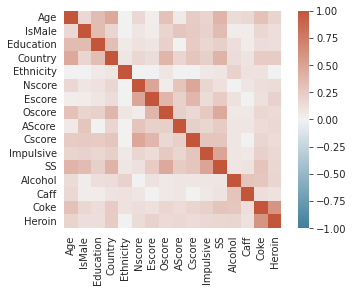

In [57]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin=-1, vmax=1, cmap=cmap)

Visually, it seems that both alcohol and caffeine do not have any strong correlations, we will rank the scores alter to get a clearer reading, for coke and Heroin the correlations seem overall stronger, which indicates to us that they should be easier to predict, acheiving better metrics, we can do some visualisations and rakings on the scores, to try and get some more data.

In [58]:
alcScores.drop(['Alcohol','Caff','Coke','Heroin'],inplace=True)
cafScores.drop(['Alcohol','Caff','Coke','Heroin'],inplace=True)
cokScores.drop(['Alcohol','Caff','Coke','Heroin'],inplace=True)
herScores.drop(['Alcohol','Caff','Coke','Heroin'],inplace=True)

alcScores.sort_values(ascending=False,inplace=True,by= 'Alcohol')
cafScores.sort_values(ascending=False,inplace=True,by= 'Caff')
cokScores.sort_values(ascending=False,inplace=True,by= 'Coke')
herScores.sort_values(ascending=False,inplace=True,by= 'Heroin')

<ipython-input-58-337a0439fe54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcScores.drop(['Alcohol','Caff','Coke','Heroin'],inplace=True)
<ipython-input-58-337a0439fe54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cafScores.drop(['Alcohol','Caff','Coke','Heroin'],inplace=True)
<ipython-input-58-337a0439fe54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cokScores.drop(['Alcohol','Caff','Coke','Heroin'],inplace=True)
<ipy

<Axes: >

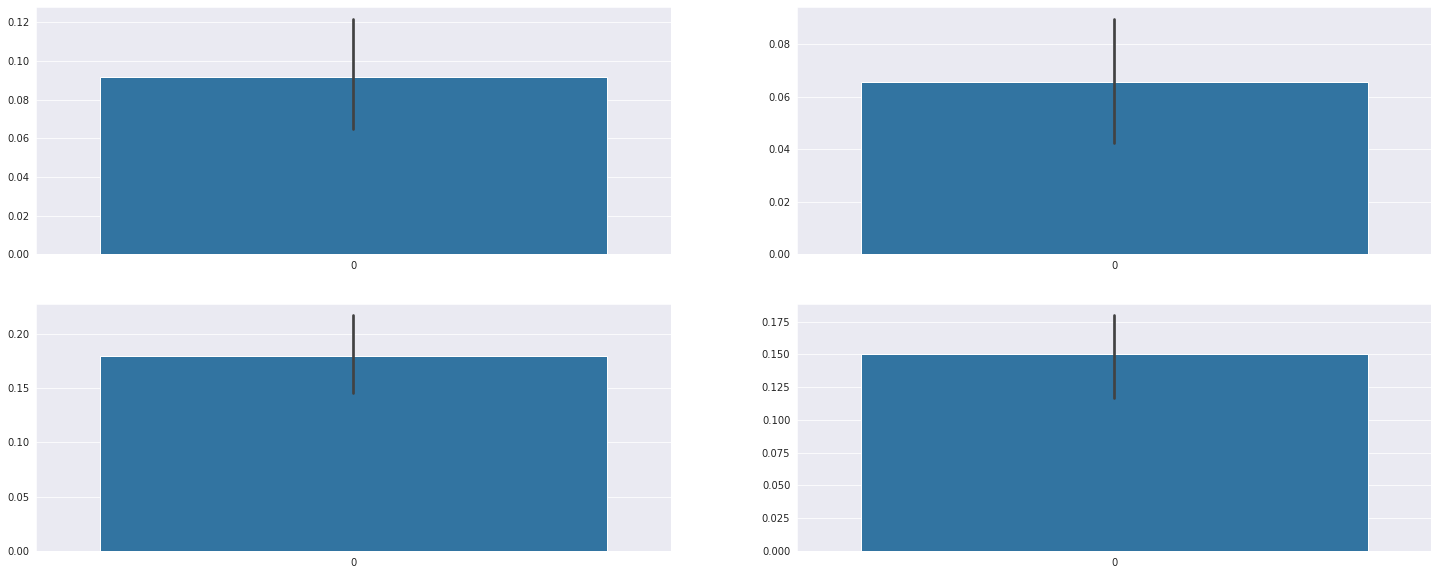

In [59]:
fig, axes = plt.subplots(2,2, figsize=(25, 10))
sns.barplot(alcScores.Alcohol,ax=axes[0,0])
sns.barplot(cafScores.Caff,ax=axes[0,1])
sns.barplot(cokScores.Coke,ax=axes[1,0])
sns.barplot(herScores.Heroin,ax=axes[1,1])

In [60]:
top10alc = alcScores.iloc[0:10].index
top10caf = cafScores.iloc[0:10].index
top10cok = cokScores.iloc[0:10].index
top10her = herScores.iloc[0:10].index

print(str(top10alc)+'\r'+str(top10caf)+'\r'+str(top10cok)+'\r'+str(top10her))

Index(['Ethnicity', 'Age', 'Country', 'Education', 'Escore', 'AScore', 'SS',
       'Cscore', 'Impulsive', 'Oscore'],
Index(['Age', 'Ethnicity', 'Country', 'SS', 'AScore', 'Nscore', 'Impulsive',
       'Oscore', 'IsMale', 'Education'],
Index(['Age', 'SS', 'Country', 'Impulsive', 'Cscore', 'Oscore', 'IsMale',
       'AScore', 'Education', 'Nscore'],
Index(['Country', 'Escore', 'Age', 'SS', 'Impulsive', 'AScore', 'Oscore',
       'Cscore', 'Nscore', 'IsMale'],
      dtype='object')


The feature with the overall larger correlation scores was Coke, that indicates to us that it will be most likely the easiest oen to predict, the worst one for now seems it will be caffeine, but we will verifyt that on the next step of modeling.

# Encoding

Before proceeding to classification we need to encode our categorical features, there are many ways of doing so and I will be using the one of the simplest ones.

The encoding technique I will be using is a simple numerical encoding, that will be great for our ordered categories, since it works in the way that it encodes the feature while keeping the ordered relationship betweeen the different categories, it has some drawbacks when used with non ordered cateories, but it usually isn't a big problem, so it is what we will be using.

In [61]:
ageTemp = train_data['Age']
ageTemp = ageTemp.replace('18-24',1)
ageTemp = ageTemp.replace('25-34',2)
ageTemp = ageTemp.replace('35-44',3)
ageTemp = ageTemp.replace('45-54',4)
ageTemp = ageTemp.replace('55+',5)
train_data['Age'] = ageTemp
ageTemp = test_data['Age']
ageTemp = ageTemp.replace('18-24',1)
ageTemp = ageTemp.replace('25-34',2)
ageTemp = ageTemp.replace('35-44',3)
ageTemp = ageTemp.replace('45-54',4)
ageTemp = ageTemp.replace('55+',5)
test_data['Age'] = ageTemp

In [62]:
Temp = train_data['Education']
Temp = Temp.replace('Left school',1)
Temp = Temp.replace('Some college or university, no certificate or degree',2)
Temp = Temp.replace('Professional certificate/ diploma',3)
Temp = Temp.replace('University degree',4)
Temp = Temp.replace('Masters degree',5)
Temp = Temp.replace('Doctorate degree',6)
train_data['Education'] = Temp
Temp = test_data['Education']
Temp = Temp.replace('Left school',1)
Temp = Temp.replace('Some college or university, no certificate or degree',2)
Temp = Temp.replace('Professional certificate/ diploma',3)
Temp = Temp.replace('University degree',4)
Temp = Temp.replace('Masters degree',5)
Temp = Temp.replace('Doctorate degree',6)
test_data['Education'] = Temp

In [63]:
Temp = train_data['Ethnicity']
Temp = Temp.replace('White',1)
Temp = Temp.replace('Other',2)
Temp = Temp.replace('Black',3)
Temp = Temp.replace('Asian',4)
train_data['Ethnicity'] = Temp
Temp = test_data['Ethnicity']
Temp = Temp.replace('White',1)
Temp = Temp.replace('Other',2)
Temp = Temp.replace('Black',3)
Temp = Temp.replace('Asian',4)
test_data['Ethnicity'] = Temp

In [64]:
Temp = train_data['Country']
Temp = Temp.replace('UK',1)
Temp = Temp.replace('USA',2)
Temp = Temp.replace('Other',3)
Temp = Temp.replace('Canada',4)
Temp = Temp.replace('Australia',5)
train_data['Country'] = Temp
Temp = test_data['Country']
Temp = Temp.replace('UK',1)
Temp = Temp.replace('USA',2)
Temp = Temp.replace('Other',3)
Temp = Temp.replace('Canada',4)
Temp = Temp.replace('Australia',5)
test_data['Country'] = Temp

Now that the features are encoded, we can proceed to our classification.

*Note: The order for the country and ethnicity is just based on the number of entries*

# Classification

We will be using two classification algorithms, a decision tree classifier and a naive bayes classifier, the decision tree is a robust algorithm based on the data structure of a tree, it basically starts from a single node, and that node branches off ito two different nodes based on the data provided and so on, the naive bayes is a classifier based on mathematical studies on probaility, and I suspect it would work well with our dataset due to the large amount of categorical features, which should play well with the model.

# Alcohol

The first features we will try out with our model will be the ones picked as the 10 best ones with the phik correlation calculation, we can then reduce the number of features and alter the model in other ways

We will be starting with our Decision Tree Classifier, we will set a maximum depth of 10 and a maximum amount of leaves of 20, just as a standard which we can change as needed later

In [65]:
from sklearn.tree import DecisionTreeClassifier

alcoholM1 = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 20,random_state = 42)
alcoholM1.fit(train_data[top10alc],y=train_data['Alcohol'])

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, random_state=42) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. DecisionTreeClassifier DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, random_state=42)

In [66]:
alcoholP1 = alcoholM1.predict(test_data[top10alc])

Now that we have our model and predictions we can get our metrics, we will be using the F1, recall and accuracy when evaluating our models, acuraccy is pretty simple, its just he percentage of 'correct guesses', recall is a bit more complicated and is putting it simply the ability of the classifier to find all the positive samples.

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score

def getMetrics(target:str, predictions):
    acc = accuracy_score(test_data[target], predictions)
    print('Accuracy: '+str(acc))
    recall = recall_score(test_data[target], predictions,average = 'macro')
    print('Recall: '+str(recall))
    f1 = f1_score(test_data[target],predictions, average = 'macro')
    print('F1: '+str(f1))
    confusionMat = confusion_matrix(test_data[target], predictions)
    print('Confusion matrix:\n')
    print(confusionMat)
    return acc,recall,f1

In [68]:
alcM1acc,alcM1rec,alcM1f1 = getMetrics('Alcohol',alcoholP1)

Accuracy: 0.3439153439153439
Recall: 0.17430766632894293
F1: 0.15311608514373493
Confusion matrix:

[[ 1  0  0  0  0  3  0]
 [ 0  0  0  0  0  5  1]
 [ 0  0  0  0  0  8  4]
 [ 0  0  0  0  0 13  4]
 [ 0  0  0  0  0 28  3]
 [ 1  0  0  0  0 53 18]
 [ 0  0  0  0  1 35 11]]


We got pretty good metrics, so we can use our next classifier.

For our next classifier, we will use the naive bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

alcoholM2 = GaussianNB()
alcoholM2.fit(train_data[top10alc],y=train_data['Alcohol'])

GaussianNB() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. GaussianNB GaussianNB()

In [70]:
alcoholP2 = alcoholM2.predict(test_data[top10alc])
alcM2acc,alcM2rec,alcM2f1 = getMetrics('Alcohol',alcoholP2)

Accuracy: 0.3492063492063492
Recall: 0.22630895185802527
F1: 0.18598302423968285
Confusion matrix:

[[ 2  1  0  0  0  0  1]
 [ 1  0  0  0  0  2  3]
 [ 0  0  0  0  1  5  6]
 [ 1  0  0  0  3  8  5]
 [ 1  2  0  2  5 18  3]
 [ 3  1  0  4  7 45 12]
 [ 2  0  0  1  3 27 14]]


We acheived slightly better metrics with the naive bayes classifier, having a higher accuracy as well as a higher recall and f1 scores.

In the end, the naive bayes is the best predictive model for the alcohol feature, having better metrics as well as being simples and faster to execute.

# Caffeine

We can now set up our decision tree classifier for caffeine.

In [71]:
caffeineM1 = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 20,random_state = 42)
caffeineM1.fit(train_data[top10caf],y=train_data['Caff'])
caffeineP1 = caffeineM1.predict(test_data[top10caf])

In [72]:
cafM1acc,cafM1rec,cafM1f1 = getMetrics('Caff',caffeineP1)

Accuracy: 0.7354497354497355
Recall: 0.1408308004052685
F1: 0.12145041502839668
Confusion matrix:

[[  0   0   0   0   0   0   4]
 [  0   0   0   0   0   0   3]
 [  0   0   0   0   0   0   4]
 [  0   0   0   0   0   0   3]
 [  0   0   0   0   0   1  11]
 [  0   0   0   0   0   0  22]
 [  0   0   0   0   1   1 139]]


The metrics for caffeine are ok, the accuracy was really good, but the F1 was pretty bad, since our model basically just guesses CL6 all the time, but it was ok overall.

In [73]:
caffeineM2 = GaussianNB()
caffeineM2.fit(train_data[top10caf],y=train_data['Caff'])
caffeineP2 = caffeineM2.predict(test_data[top10caf])

In [74]:
cafM2acc,cafM2rec,cafM2f1 = getMetrics('Caff',caffeineP2)

Accuracy: 0.6878306878306878
Recall: 0.17737404439532098
F1: 0.1603407345342829
Confusion matrix:

[[  1   0   0   0   0   1   2]
 [  1   0   0   0   0   0   2]
 [  0   0   0   0   0   0   4]
 [  0   0   0   0   0   0   3]
 [  0   0   0   0   0   1  11]
 [  0   0   0   0   0   2  20]
 [  5   0   0   1   1   7 127]]


For this target the decision tree classifier ended up being better, the naive bayes had worse metrics, but it can be debated that NB is bettter in terms of the overall model quality since it has more diverse predictions, instead of just guessing the same thing over and over.

# Cocaine

We can start with our decision tree model again, we will again, be using the fetures gotten form the correlation matricies. 

In [75]:
cocaineM1 = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 20,random_state = 42)
cocaineM1.fit(train_data[top10cok],y=train_data['Coke'])
cocaineP1 = cocaineM1.predict(test_data[top10cok])

In [76]:
cokM1acc,cokM1rec,cokM1f1 = getMetrics('Coke',cocaineP1)

Accuracy: 0.5608465608465608
Recall: 0.19390669567777793
F1: 0.1826839826839827
Confusion matrix:

[[97  0  0  4  0  0  0]
 [12  3  0  1  0  0  0]
 [23  2  1  1  0  0  0]
 [20  3  1  5  0  0  0]
 [ 8  0  1  3  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 3  0  0  0  0  0  0]]


We got decent results with the decision tree classifier, and this time we got a better recall and F1 score, next onto the naive bayes classifier.

In [77]:
cocaineM2 = GaussianNB()
cocaineM2.fit(train_data[top10cok],y=train_data['Coke'])
cocaineP2 = cocaineM2.predict(test_data[top10cok])

In [78]:
cokM2acc,cokM2rec,cokM2f1 = getMetrics('Coke',cocaineP2)

Accuracy: 0.4656084656084656
Recall: 0.17750970499348787
F1: 0.14816480874931473
Confusion matrix:

[[73  0  1 26  1  0  0]
 [14  0  1  1  0  0  0]
 [18  1  1  7  0  0  0]
 [11  0  3 14  0  1  0]
 [ 5  0  0  7  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 1  0  0  2  0  0  0]]


Again, decision tree clasifier had better metrics, with a better accuracy and recall, meaning it guessed right more often and didnt just spam one option.

# Heroin

For heroin we will start with our decision tree classifier

In [79]:
heroinM1 = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 20,random_state = 42)
heroinM1.fit(train_data[top10her],y=train_data['Heroin'])
heroinP1 = heroinM1.predict(test_data[top10her])

In [80]:
herM1acc,herM1rec,herM1f1 = getMetrics('Heroin',heroinP1)

Accuracy: 0.798941798941799
Recall: 0.19156118143459913
F1: 0.1791125541125541
Confusion matrix:

[[150   5   2   1   0   0]
 [  4   1   0   0   0   0]
 [  9   0   0   0   0   0]
 [  8   0   0   0   0   0]
 [  4   0   0   1   0   0]
 [  3   0   0   1   0   0]]


We got very good accuracy but with poor recall and F1 scores.

In [81]:
heroinM2 = GaussianNB()
heroinM2.fit(train_data[top10her],y=train_data['Heroin'])
heroinP2 = heroinM2.predict(test_data[top10her])

In [82]:
herM2acc,herM2rec,herM2f1 = getMetrics('Heroin',heroinP2)

Accuracy: 0.7619047619047619
Recall: 0.17283504118947154
F1: 0.18567672467760113
Confusion matrix:

[[142   2   3   2   0   5   4]
 [  5   0   0   0   0   0   0]
 [  7   0   1   0   0   0   1]
 [  8   0   0   0   0   0   0]
 [  3   0   1   0   1   0   0]
 [  3   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0]]


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Again, the decision tree classfier was better haivng, slightly better metrics.

In conclusion, for most targets the naive bayes performed slightly worse than the decision tree, with the exception of alcohol, where it had a slightly worse performance, but in general, it can be said that the decision tree is better for this dataset.

# Clustering

In [83]:
# ordinarily encode alcohol 
Temp = train_data['Alcohol']
Temp = Temp.replace('CL0', 0)
Temp = Temp.replace('CL1', 1)
Temp = Temp.replace('CL2', 2)
Temp = Temp.replace('CL3', 3)
Temp = Temp.replace('CL4', 4)
Temp = Temp.replace('CL5', 5)
Temp = Temp.replace('CL6', 6)
train_data['Alcohol'] = Temp
Temp = train_data['Caff']
Temp = Temp.replace('CL0', 0)
Temp = Temp.replace('CL1', 1)
Temp = Temp.replace('CL2', 2)
Temp = Temp.replace('CL3', 3)
Temp = Temp.replace('CL4', 4)
Temp = Temp.replace('CL5', 5)
Temp = Temp.replace('CL6', 6)
train_data['Caff'] = Temp
Temp = train_data['Coke']
Temp = Temp.replace('CL0', 0)
Temp = Temp.replace('CL1', 1)
Temp = Temp.replace('CL2', 2)
Temp = Temp.replace('CL3', 3)
Temp = Temp.replace('CL4', 4)
Temp = Temp.replace('CL5', 5)
Temp = Temp.replace('CL6', 6)
train_data['Coke'] = Temp
Temp = train_data['Heroin']
Temp = Temp.replace('CL0', 0)
Temp = Temp.replace('CL1', 1)
Temp = Temp.replace('CL2', 2)
Temp = Temp.replace('CL3', 3)
Temp = Temp.replace('CL4', 4)
Temp = Temp.replace('CL5', 5)
Temp = Temp.replace('CL6', 6)
train_data['Heorin'] = Temp

In [84]:
# generate linkage for hierarchical clustering 
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# generate the linkage matrix
linkage_matrix = linkage(train_data, 'ward')

# create a dendrogram using the linkage matrix
dendrogram = dendrogram(linkage_matrix)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

ValueError: ValueError: could not convert string to float: 'CL3'

In [85]:
# do k-means clustering witht 3 clusters 
from sklearn.cluster import KMeans

# Choose three clusters
kmeans_model = KMeans(n_clusters=3, random_state=1)

# Fit the model
kmeans_model.fit(train_data)

# Get the cluster assignments
cluster_assignments = kmeans_model.labels_

# Printing the cluster assignments to check the result
print(cluster_assignments)

ValueError: ValueError: could not convert string to float: 'CL3'